<a href="https://colab.research.google.com/github/advaymehta009/airb/blob/master/Eli_Lilly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pwd
%cd ~//Downloads/music_genre

C:\Users\advay\Downloads\music_genre


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [4]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [5]:
test_df.isnull().sum()

instance_id            0
track_name             0
popularity           166
acousticness           0
danceability         139
duration_ms           21
energy                33
instrumentalness      23
key                    0
liveness               0
loudness               3
voice_gender         186
mode                  14
speechiness            7
tempo                  0
musician_category    312
valence              191
dtype: int64

In [6]:
train_df

instance_id                             track_name  popularity  \
0      MSC_83537.0                  Estrellitas y Duendes      49.178   
1      MSC_22044.0                               Al Norte      59.827   
2      MSC_62017.0       Yeah! (feat. Lil Jon & Ludacris)      89.023   
3      MSC_76365.0                          Can’t You See      55.762   
4      MSC_71493.0  Sonata III (G Moll), BWV 1029: Adagio      45.095   
...            ...                                    ...         ...   
15676  MSC_73047.0                             I. Andante       0.000   
15677  MSC_34472.0                  Only Trust Your Heart      40.514   
15678  MSC_32827.0                        Moment's Notice      35.082   
15679  MSC_89976.0                      Such Small Scenes      59.693   
15680  MSC_43297.0                            Dogs of War      56.518   

       acousticness  danceability  duration_ms    energy  instrumentalness  \
0          0.970522      0.580508   214625.776  0.192107          0.000000   
1          1.009380      0.687542   216232.195  0.265942          0.000031   
2          0.020041      0.967948   273314.723  0.857411          0.000000   
3          0.010284      0.616287   189189.605  0.970513          0.000220   
4          0.858769      0.280645   410136.987  0.114732          0.002753   
...             ...           ...          ...       ...               ...   
15676      0.866988      0.387476       -1.000  0.196799          0.028725   
15677      0.883333      0.459917   378128.464  0.349263          0.000519   
15678      0.905281      0.566619   581799.061  0.543673          0.209238   
15679      0.113408      0.644554   151226.592  0.912201          0.000089   
15680      0.847136      0.502160   190735.191  0.470057          0.502878   

                 key  liveness  loudness voice_gender   mode  speechiness  \
0            Scale E  0.147134   -14.140          NaN  Major     0.046404   
1            Scale A  0.174655   -13.716         Male      ?     0.039949   
2            Scale D  0.042030    -4.995       Female  Major     0.119917   
3            Scale D  0.124637    -4.262         Both  Major     0.167493   
4      Scale F Sharp  0.134782   -26.922       Female  Minor     0.039139   
...              ...       ...       ...          ...    ...          ...   
15676        Scale B  0.248399   -16.331       Female  Major     0.045251   
15677        Scale F  0.681492   -25.087         Both  Major     0.448377   
15678  Scale D Sharp  0.416611   -10.246       Female  Major     0.040625   
15679        Scale F  0.166336    -7.257         Both  Minor     0.060308   
15680        Scale F  0.143114   -11.043       Female  Major     0.029906   

                    tempo musician_category   valence music_genre  
0      143.78799999999998              Band  0.598965        Jazz  
1                       ?              Band  0.357194        Jazz  
2      105.01799999999999              Band  0.635525         Rap  
3                       ?              Duet  0.983750        Rock  
4      112.18299999999999              Band  0.074412   Classical  
...                   ...               ...       ...         ...  
15676             123.516              Band  0.624518   Classical  
15677             129.445              Duet  0.609022        Jazz  
15678              123.17               NaN  0.869294        Jazz  
15679  116.07700000000001              Duet  0.402700        Rock  
15680                94.2              Solo  0.358777   Classical  

[15681 rows x 18 columns]

# **Training Dataset features:**
instance_id <br>
track_name <br>
**popularity**<br>
**acousticness**<br>
**danceability**<br>
**duration_ms** <br>
**energy** <br>
**instrumentalness**<br>
**key** : Sharpness (categorical feature) <br>
**liveness** <br>
**loudness**<br>
**voice_gender** : (male, female, duet - categorical feature) <br>
**mode** : (major, mode) <br>
**speechiness** <br>
**tempo** <br>
**musician_category** : (musician_category) <br>
**valence** <br><br>
### Target Feature : **music_genre** <br>


 

In [7]:
train_df.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

In [8]:
train_df.describe()

popularity  acousticness  danceability   duration_ms        energy  \
count  15039.000000  15681.000000  15125.000000  1.558700e+04  15587.000000   
mean      50.822720      0.446922      0.570106  2.480008e+05      0.426977   
std       17.679789      0.416981      0.215045  1.568312e+05      0.514145   
min        0.000000      0.000002      0.063962 -1.000000e+00     -1.000000   
25%       39.017000      0.044521      0.418635  1.860163e+05      0.158277   
50%       54.109000      0.295272      0.586114  2.362127e+05      0.560389   
75%       63.449000      0.929001      0.733073  2.975593e+05      0.791881   
max      108.512000      1.094410      1.072089  3.410383e+06      1.094853   

       instrumentalness      liveness      loudness   speechiness  \
count      15586.000000  15681.000000  15645.000000  15655.000000   
mean           0.264290      0.194089    -11.621471      0.096411   
std            0.395788      0.160291      8.663364      0.105647   
min            0.000000      0.016652    -50.054000      0.023858   
25%            0.000000      0.101674    -15.504000      0.039549   
50%            0.000719      0.128784     -8.611000      0.050425   
75%            0.638930      0.228973     -5.715000      0.094230   
max            1.078601      1.080959      1.389000      1.000445   

            valence  
count  15004.000000  
mean       0.451400  
std        0.277220  
min        0.000000  
25%        0.212242  
50%        0.432478  
75%        0.665369  
max        1.076971

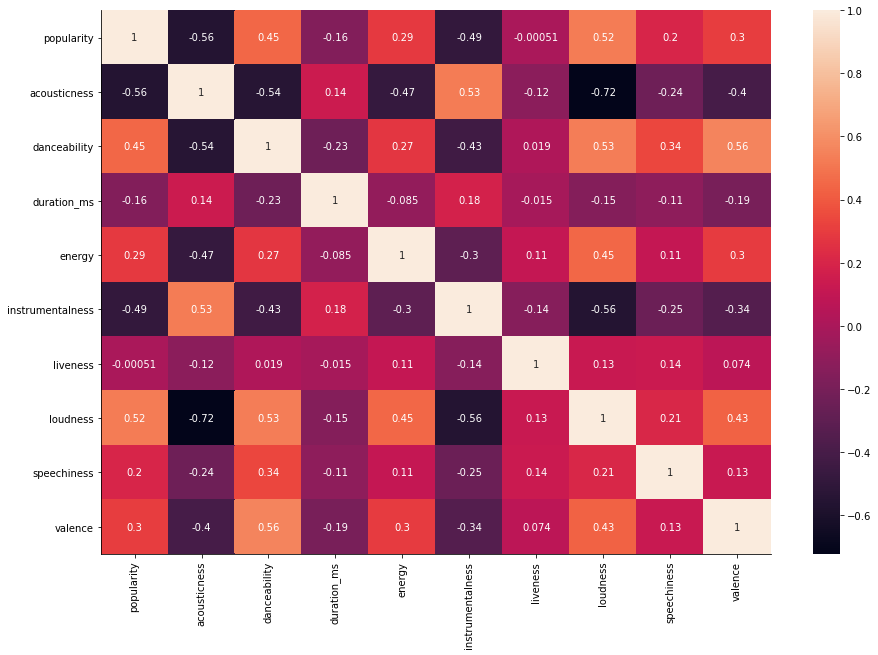

In [9]:
corr = train_df.corr()
g = sns.heatmap(corr, annot=True)
sns.despine()
g.figure.set_size_inches(15,10)
plt.show()

In [10]:
useful_corr = corr[(corr >= 0.15) & (corr < 1)]
# useful_corr

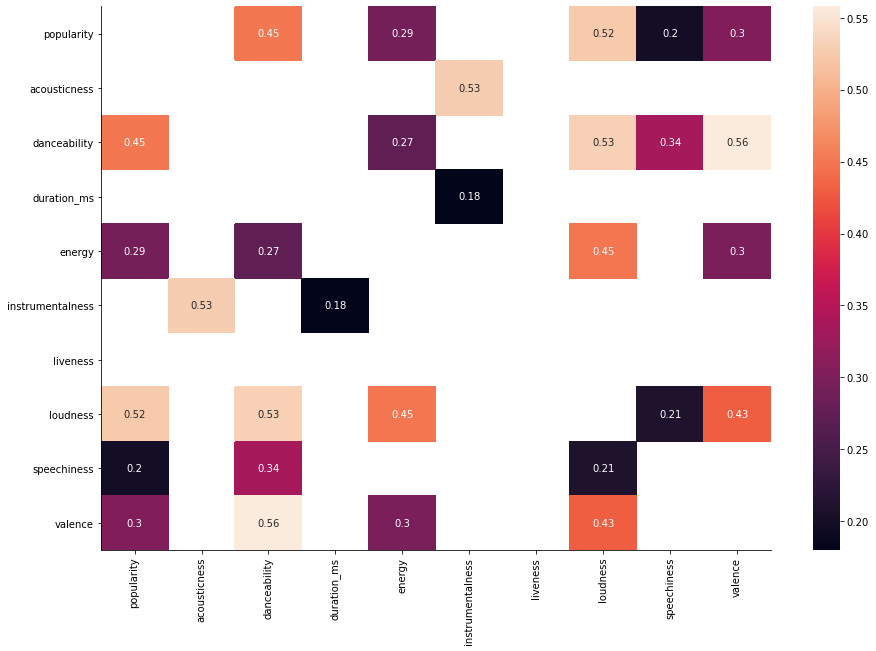

In [11]:
g = sns.heatmap(useful_corr, annot=True)
sns.despine()
g.figure.set_size_inches(15,10)
plt.show()

In [12]:
train_df = train_df.replace('?',np.nan)

In [13]:
train_df.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                 1114
speechiness            26
tempo                1476
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [14]:
# per = (train_df.isnull().sum()/train_df.shape[0])*100
# per

In [15]:
df = train_df.copy()
df.popularity

0        49.178
1        59.827
2        89.023
3        55.762
4        45.095
          ...  
15676     0.000
15677    40.514
15678    35.082
15679    59.693
15680    56.518
Name: popularity, Length: 15681, dtype: float64

In [16]:
df.popularity.mean()

50.82272032714922

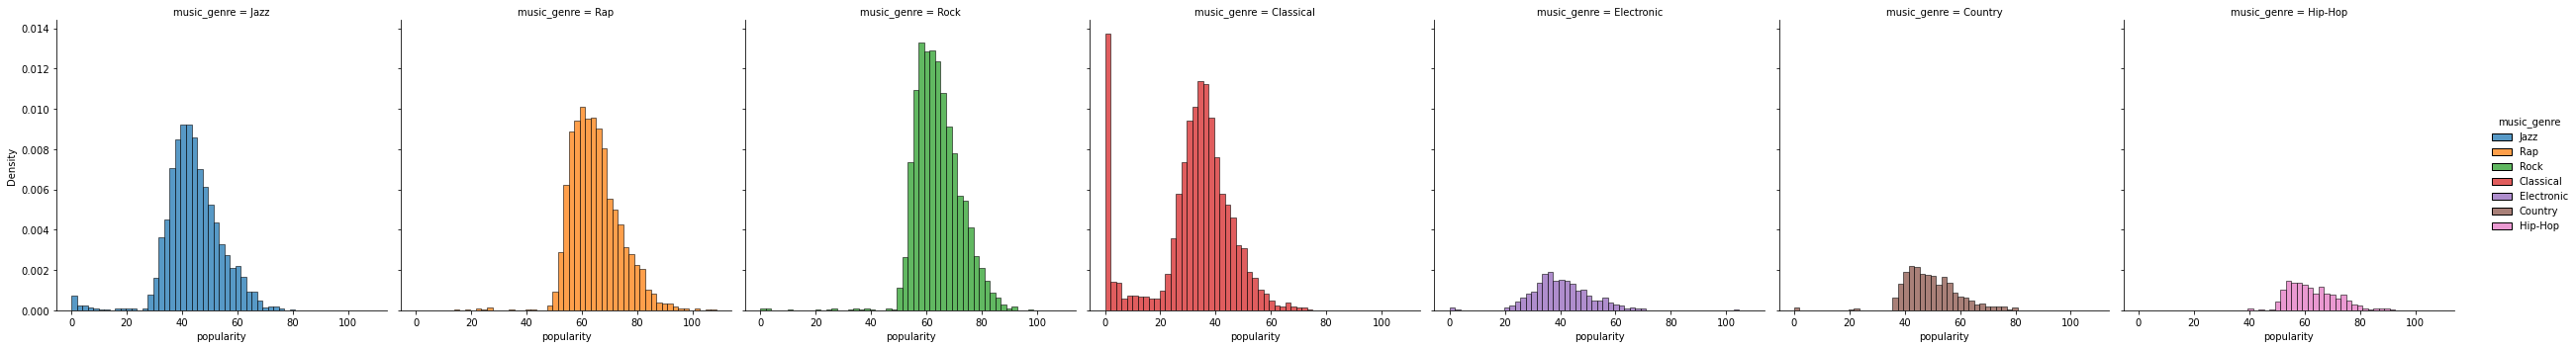

In [17]:
sns.displot(df, x="popularity", col="music_genre", hue='music_genre', stat='density')

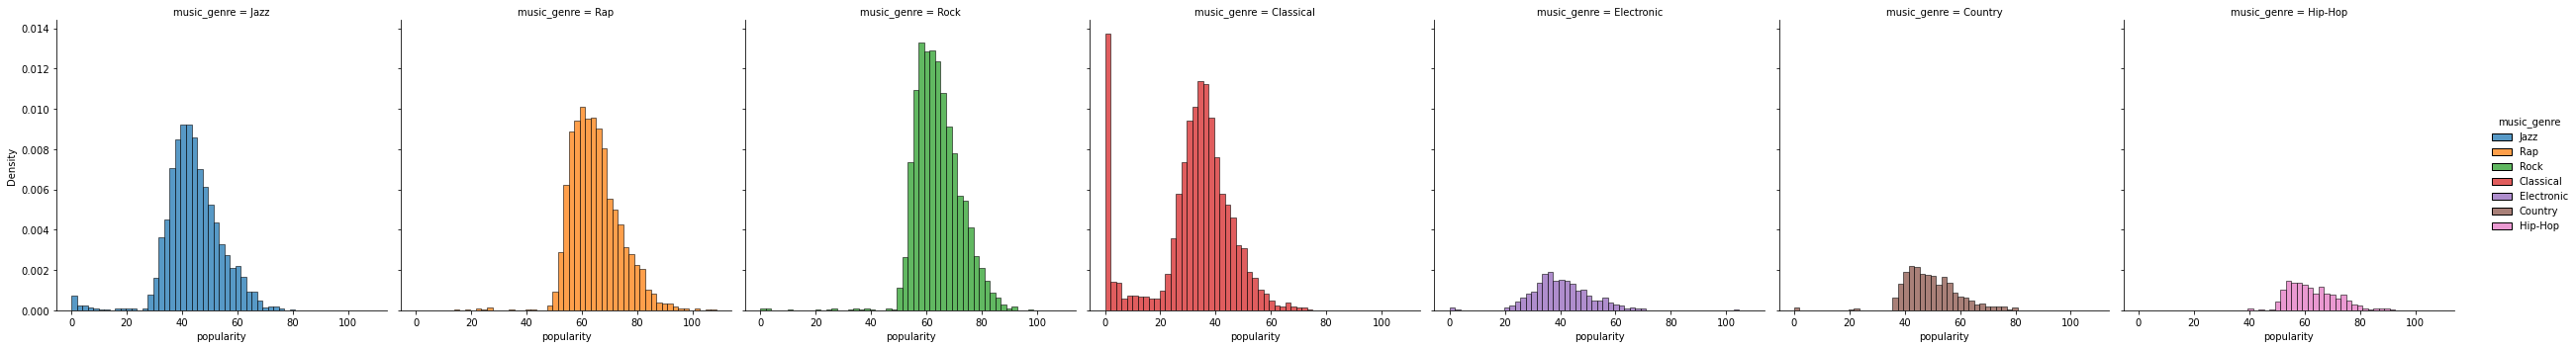

In [18]:
sns.displot(df, x="popularity", col="music_genre", hue='music_genre', stat='density')

In [19]:
df1 = df[['popularity', 'music_genre']]
df1[df1.music_genre == 'Jazz']

popularity music_genre
0          49.178        Jazz
1          59.827        Jazz
9          34.034        Jazz
13         39.264        Jazz
14         56.018        Jazz
...           ...         ...
15661      31.590        Jazz
15665      48.394        Jazz
15672      51.316        Jazz
15677      40.514        Jazz
15678      35.082        Jazz

[2850 rows x 2 columns]

In [20]:
df1.isnull().sum()


popularity     642
music_genre      0
dtype: int64

In [21]:
df1[df1.music_genre == 'Jazz'].median()

popularity    43.399
dtype: float64

In [22]:
jazz_pop_median =  float(df1[df1.music_genre == 'Jazz'].median())
jazz_pop_median
# jazz_pop_mean

43.399

In [23]:
# df1 = df1[df1.music_genre == 'Jazz'].fillna(jazz_pop_mean)
# float(df1[df1.music_genre == 'Jazz'].mean())

In [24]:
rap_pop_median = float(df1[df1.music_genre == 'Rap'].median())
rap_pop_median

63.718

In [25]:
rock_pop_median = float(df1[df1.music_genre == 'Rock'].median())
rock_pop_median

63.2505

In [26]:
classical_pop_mean = float(df1[df1.music_genre == 'Classical'].mean())
classical_pop_mean

31.73073901673642

In [27]:
electronic_pop_median = float(df1[df1.music_genre == 'Electronic'].median())
electronic_pop_median

39.535

In [28]:
country_pop_median = float(df1[df1.music_genre == 'Country'].median())
country_pop_median

48.322

In [29]:
hip_hop_pop_median = float(df1[df1.music_genre == 'Hip-Hop'].median())
hip_hop_pop_median

61.3905

In [30]:
#popularity
train_df.popularity.describe()

count    15039.000000
mean        50.822720
std         17.679789
min          0.000000
25%         39.017000
50%         54.109000
75%         63.449000
max        108.512000
Name: popularity, dtype: float64

In [31]:
df = train_df.copy()
df.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                 1114
speechiness            26
tempo                1476
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [32]:
def impute_pop(cols):
  pop = cols[0]
  music_genre = cols[1]
  
  if pd.isnull(pop):
    if music_genre == 'Jazz':
      return jazz_pop_median
    if music_genre == 'Rap':
      return rap_pop_median
    if music_genre == 'Rock':
      return rock_pop_median
    if music_genre == 'Classical':
      return classical_pop_mean
    if music_genre == 'Electronic':
      return electronic_pop_median
    if music_genre == 'Country':
      return country_pop_median
    if music_genre == 'Hip-Hop':
      return hip_hop_pop_median
  else:
    return pop
    
# df['popularity'] = df[['popularity', 'music_genre']].apply(impute_pop, axis=1)  
df['popularity'] = df[['popularity', 'music_genre']].apply(impute_pop, axis=1) 
df

instance_id                             track_name  popularity  \
0      MSC_83537.0                  Estrellitas y Duendes      49.178   
1      MSC_22044.0                               Al Norte      59.827   
2      MSC_62017.0       Yeah! (feat. Lil Jon & Ludacris)      89.023   
3      MSC_76365.0                          Can’t You See      55.762   
4      MSC_71493.0  Sonata III (G Moll), BWV 1029: Adagio      45.095   
...            ...                                    ...         ...   
15676  MSC_73047.0                             I. Andante       0.000   
15677  MSC_34472.0                  Only Trust Your Heart      40.514   
15678  MSC_32827.0                        Moment's Notice      35.082   
15679  MSC_89976.0                      Such Small Scenes      59.693   
15680  MSC_43297.0                            Dogs of War      56.518   

       acousticness  danceability  duration_ms    energy  instrumentalness  \
0          0.970522      0.580508   214625.776  0.192107          0.000000   
1          1.009380      0.687542   216232.195  0.265942          0.000031   
2          0.020041      0.967948   273314.723  0.857411          0.000000   
3          0.010284      0.616287   189189.605  0.970513          0.000220   
4          0.858769      0.280645   410136.987  0.114732          0.002753   
...             ...           ...          ...       ...               ...   
15676      0.866988      0.387476       -1.000  0.196799          0.028725   
15677      0.883333      0.459917   378128.464  0.349263          0.000519   
15678      0.905281      0.566619   581799.061  0.543673          0.209238   
15679      0.113408      0.644554   151226.592  0.912201          0.000089   
15680      0.847136      0.502160   190735.191  0.470057          0.502878   

                 key  liveness  loudness voice_gender   mode  speechiness  \
0            Scale E  0.147134   -14.140          NaN  Major     0.046404   
1            Scale A  0.174655   -13.716         Male    NaN     0.039949   
2            Scale D  0.042030    -4.995       Female  Major     0.119917   
3            Scale D  0.124637    -4.262         Both  Major     0.167493   
4      Scale F Sharp  0.134782   -26.922       Female  Minor     0.039139   
...              ...       ...       ...          ...    ...          ...   
15676        Scale B  0.248399   -16.331       Female  Major     0.045251   
15677        Scale F  0.681492   -25.087         Both  Major     0.448377   
15678  Scale D Sharp  0.416611   -10.246       Female  Major     0.040625   
15679        Scale F  0.166336    -7.257         Both  Minor     0.060308   
15680        Scale F  0.143114   -11.043       Female  Major     0.029906   

                    tempo musician_category   valence music_genre  
0      143.78799999999998              Band  0.598965        Jazz  
1                     NaN              Band  0.357194        Jazz  
2      105.01799999999999              Band  0.635525         Rap  
3                     NaN              Duet  0.983750        Rock  
4      112.18299999999999              Band  0.074412   Classical  
...                   ...               ...       ...         ...  
15676             123.516              Band  0.624518   Classical  
15677             129.445              Duet  0.609022        Jazz  
15678              123.17               NaN  0.869294        Jazz  
15679  116.07700000000001              Duet  0.402700        Rock  
15680                94.2              Solo  0.358777   Classical  

[15681 rows x 18 columns]

In [33]:
df.isnull().sum()

instance_id             0
track_name              0
popularity              0
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                 1114
speechiness            26
tempo                1476
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [34]:
df[pd.isnull(df['danceability'])]

instance_id                                         track_name  \
48     MSC_81593.0                                       Thug Passion   
71     MSC_51101.0  Lord Byron - Symphonic Portrait, Op.67: VIII. ...   
72     MSC_59043.0                           All The Girls Wanna Ride   
90     MSC_49463.0                         Intergalactic - Remastered   
112    MSC_58475.0  Piano Sonata No. 10 in C Major, K. 330: I. All...   
...            ...                                                ...   
15540  MSC_26020.0  Concerto for two violins BWV 1043 in D Minor: ...   
15591  MSC_71600.0                        Wicked Game - Live Acoustic   
15610  MSC_76364.0                              Is It Too Late for Me   
15629  MSC_85700.0    Suite No. 3 in C Major, BWV 1009: III. Courante   
15662  MSC_58847.0                         Teardrop - Remastered 2006   

       popularity  acousticness  danceability  duration_ms    energy  \
48         57.815      0.158031           NaN   334887.918  0.852278   
71         29.774      0.955757           NaN   126940.363  0.048113   
72         57.427      0.056495           NaN   219488.479  0.674915   
90         75.184      0.023463           NaN   251211.758  0.907590   
112         0.000      1.047658           NaN   389841.522  0.032497   
...           ...           ...           ...          ...       ...   
15540      38.347      0.850428           NaN   299291.188  0.370443   
15591      74.481      0.698648           NaN   292860.712 -1.000000   
15610      60.265      0.921234           NaN       -1.000 -1.000000   
15629       0.000      1.047871           NaN   225438.940  0.153382   
15662      40.192      0.020631           NaN   347911.324 -1.000000   

       instrumentalness            key  liveness  loudness voice_gender  \
48             0.000000        Scale G  0.276679    -3.992         Both   
71             0.739454        Scale C  0.100322   -24.737       Female   
72             0.000000        Scale A  0.153363    -1.000         Male   
90             0.000011        Scale D  0.265604    -6.481         Both   
112            0.982387        Scale C  0.074675   -32.114       Female   
...                 ...            ...       ...       ...          ...   
15540          0.000044  Scale C Sharp  0.138488   -14.503         Both   
15591          0.000094  Scale G Sharp  0.727752    -9.871         Male   
15610          0.290283  Scale C Sharp  0.177474   -20.873         Male   
15629          0.917922  Scale F Sharp  0.138759   -23.421       Female   
15662          0.750127        Scale B  0.214104    -8.159         Male   

        mode  speechiness               tempo musician_category   valence  \
48     Major     0.248637              92.008              Duet  0.725114   
71     Major     0.041076              64.433              Band  0.038004   
72     Minor     0.079292  180.00799999999998              Band  0.496305   
90     Major     0.331300  105.93299999999999              Duet  0.515215   
112    Major     0.042667              141.49              Solo  0.666172   
...      ...          ...                 ...               ...       ...   
15540  Minor     0.037684  103.67200000000001              Duet  0.769979   
15591  Major     0.029979  109.37299999999999              Solo  0.287903   
15610  Major     0.157425  113.98700000000001               NaN  1.020933   
15629  Major     0.058112              88.956              Solo  0.623756   
15662  Minor     0.038879                 NaN              Band  0.186852   

      music_genre  
48            Rap  
71      Classical  
72            Rap  
90           Rock  
112     Classical  
...           ...  
15540   Classical  
15591        Rock  
15610         Rap  
15629   Classical  
15662  Electronic  

[556 rows x 18 columns]

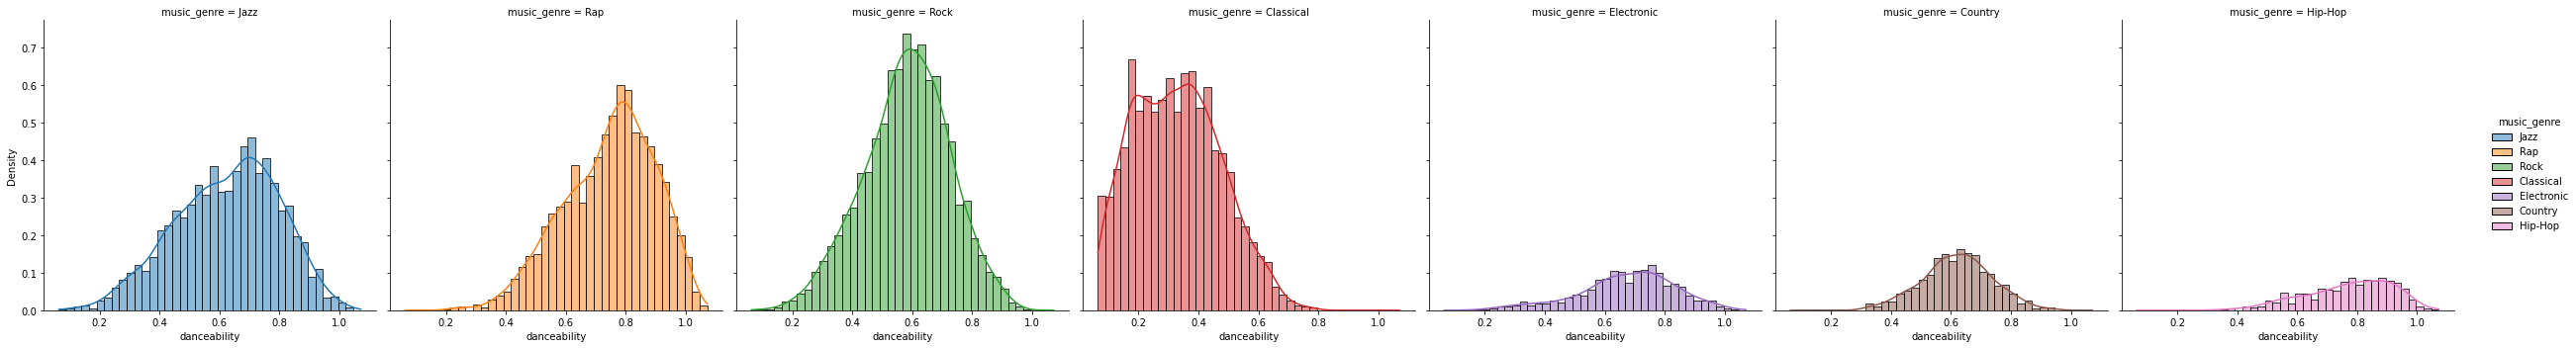

In [35]:
sns.displot(df, x="danceability", col="music_genre", hue='music_genre', stat='density', kde='True')

In [36]:
df['danceability'] = df['danceability'].fillna(df['danceability'].mean())

In [37]:
df.isnull().sum()

instance_id             0
track_name              0
popularity              0
acousticness            0
danceability            0
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                 1114
speechiness            26
tempo                1476
musician_category    1360
valence               677
music_genre             0
dtype: int64

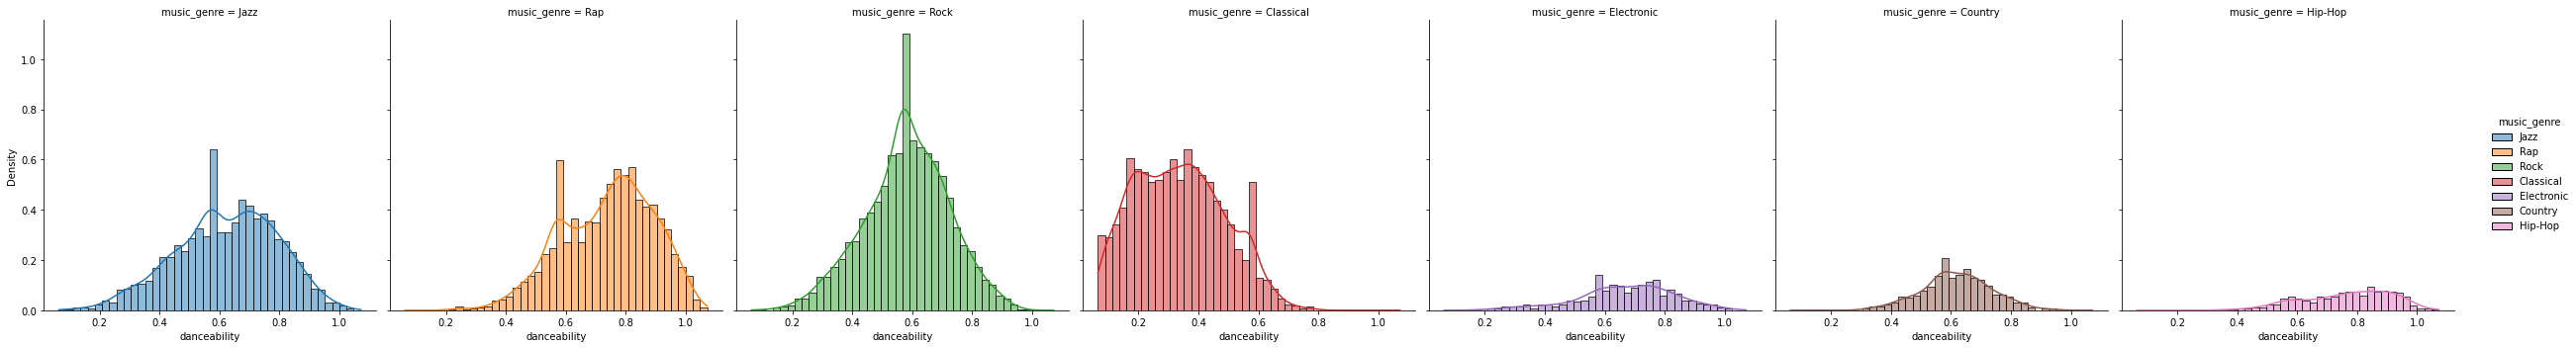

In [38]:
sns.displot(df, x="danceability", col="music_genre", hue='music_genre', stat='density', kde='True')

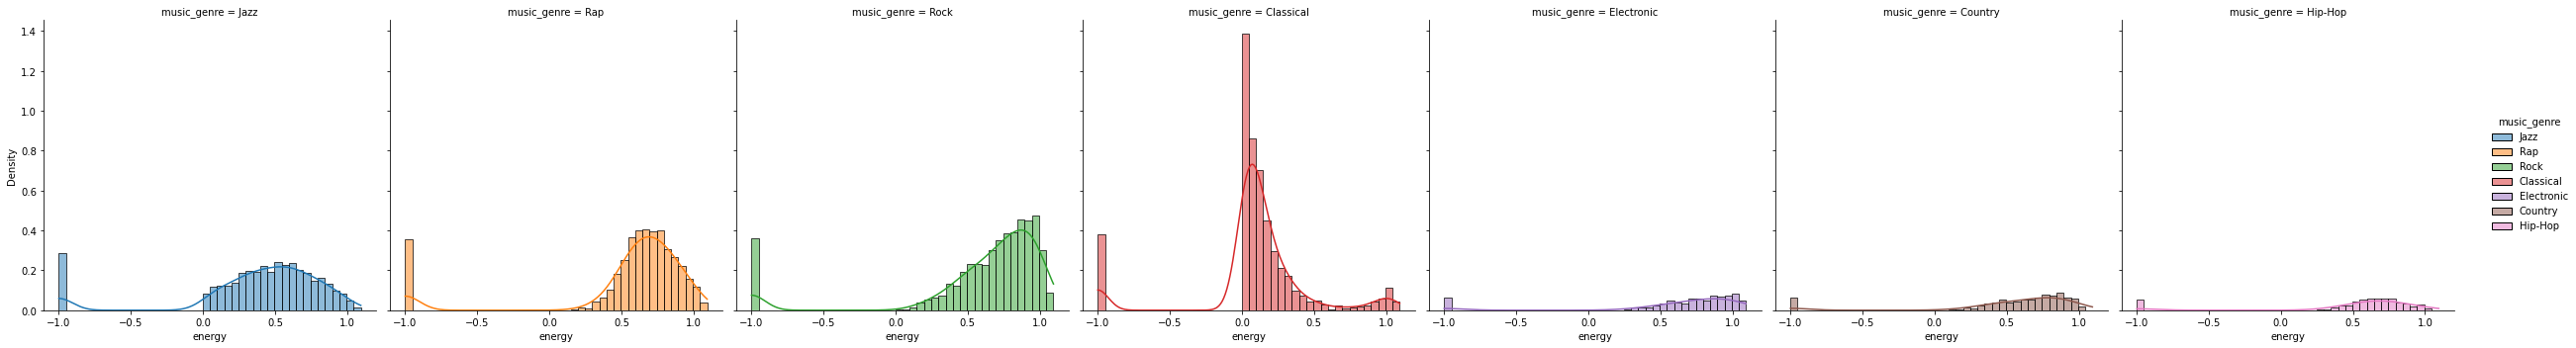

In [39]:
sns.displot(df, x="energy", col="music_genre", hue='music_genre', stat='density', kde='True')

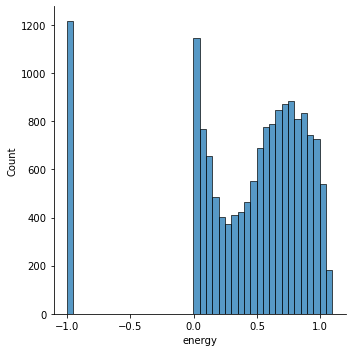

In [40]:
sns.displot(df, x='energy')


In [41]:
df2 = df[['energy','music_genre']]
df2 = df2[df2.energy>=0]
df2

energy music_genre
0      0.192107        Jazz
1      0.265942        Jazz
2      0.857411         Rap
3      0.970513        Rock
4      0.114732   Classical
...         ...         ...
15676  0.196799   Classical
15677  0.349263        Jazz
15678  0.543673        Jazz
15679  0.912201        Rock
15680  0.470057   Classical

[14370 rows x 2 columns]

In [42]:
jazz_energy_mean = float(df2[df2.music_genre == 'Jazz'].mean())
jazz_energy_mean

0.5113651249061582

In [43]:
rap_energy_mean = float(df2[df2.music_genre == 'Rap'].mean())
rap_energy_mean

0.7024766613993607

In [44]:
rock_energy_mean = float(df2[df2.music_genre == 'Rock'].mean())
rock_energy_mean

0.7400332672125319

In [45]:
classical_energy_mean = float(df2[df2.music_genre == 'Classical'].mean())
classical_energy_mean

0.18858234041177133

In [46]:
electronic_energy_mean = float(df2[df2.music_genre == 'Electronic'].mean())
electronic_energy_mean

0.7910959428587317

In [47]:
country_energy_mean = float(df2[df2.music_genre == 'Country'].mean())
country_energy_mean

0.682277239888917

In [48]:
hip_hop_energy_mean = float(df2[df2.music_genre == 'Hip-Hop'].mean())
hip_hop_energy_mean

0.6828634947878737

In [49]:
def impute_energy(cols):
  energy = cols[0]
  music_genre = cols[1]
  
  if pd.isnull(energy) or energy < 0:
    if music_genre == 'Jazz':
      return jazz_energy_mean
    if music_genre == 'Rap':
      return rap_energy_mean
    if music_genre == 'Rock':
      return rock_energy_mean
    if music_genre == 'Classical':
      return classical_energy_mean
    if music_genre == 'Electronic':
      return electronic_energy_mean
    if music_genre == 'Country':
      return country_energy_mean
    if music_genre == 'Hip-Hop':
      return hip_hop_energy_mean
  else:
    return energy
    
# df['popularity'] = df[['popularity', 'music_genre']].apply(impute_pop, axis=1)  
df['energy'] = df[['energy', 'music_genre']].apply(impute_energy, axis=1) 
df

instance_id                             track_name  popularity  \
0      MSC_83537.0                  Estrellitas y Duendes      49.178   
1      MSC_22044.0                               Al Norte      59.827   
2      MSC_62017.0       Yeah! (feat. Lil Jon & Ludacris)      89.023   
3      MSC_76365.0                          Can’t You See      55.762   
4      MSC_71493.0  Sonata III (G Moll), BWV 1029: Adagio      45.095   
...            ...                                    ...         ...   
15676  MSC_73047.0                             I. Andante       0.000   
15677  MSC_34472.0                  Only Trust Your Heart      40.514   
15678  MSC_32827.0                        Moment's Notice      35.082   
15679  MSC_89976.0                      Such Small Scenes      59.693   
15680  MSC_43297.0                            Dogs of War      56.518   

       acousticness  danceability  duration_ms    energy  instrumentalness  \
0          0.970522      0.580508   214625.776  0.192107          0.000000   
1          1.009380      0.687542   216232.195  0.265942          0.000031   
2          0.020041      0.967948   273314.723  0.857411          0.000000   
3          0.010284      0.616287   189189.605  0.970513          0.000220   
4          0.858769      0.280645   410136.987  0.114732          0.002753   
...             ...           ...          ...       ...               ...   
15676      0.866988      0.387476       -1.000  0.196799          0.028725   
15677      0.883333      0.459917   378128.464  0.349263          0.000519   
15678      0.905281      0.566619   581799.061  0.543673          0.209238   
15679      0.113408      0.644554   151226.592  0.912201          0.000089   
15680      0.847136      0.502160   190735.191  0.470057          0.502878   

                 key  liveness  loudness voice_gender   mode  speechiness  \
0            Scale E  0.147134   -14.140          NaN  Major     0.046404   
1            Scale A  0.174655   -13.716         Male    NaN     0.039949   
2            Scale D  0.042030    -4.995       Female  Major     0.119917   
3            Scale D  0.124637    -4.262         Both  Major     0.167493   
4      Scale F Sharp  0.134782   -26.922       Female  Minor     0.039139   
...              ...       ...       ...          ...    ...          ...   
15676        Scale B  0.248399   -16.331       Female  Major     0.045251   
15677        Scale F  0.681492   -25.087         Both  Major     0.448377   
15678  Scale D Sharp  0.416611   -10.246       Female  Major     0.040625   
15679        Scale F  0.166336    -7.257         Both  Minor     0.060308   
15680        Scale F  0.143114   -11.043       Female  Major     0.029906   

                    tempo musician_category   valence music_genre  
0      143.78799999999998              Band  0.598965        Jazz  
1                     NaN              Band  0.357194        Jazz  
2      105.01799999999999              Band  0.635525         Rap  
3                     NaN              Duet  0.983750        Rock  
4      112.18299999999999              Band  0.074412   Classical  
...                   ...               ...       ...         ...  
15676             123.516              Band  0.624518   Classical  
15677             129.445              Duet  0.609022        Jazz  
15678              123.17               NaN  0.869294        Jazz  
15679  116.07700000000001              Duet  0.402700        Rock  
15680                94.2              Solo  0.358777   Classical  

[15681 rows x 18 columns]

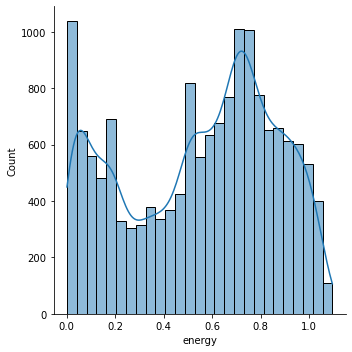

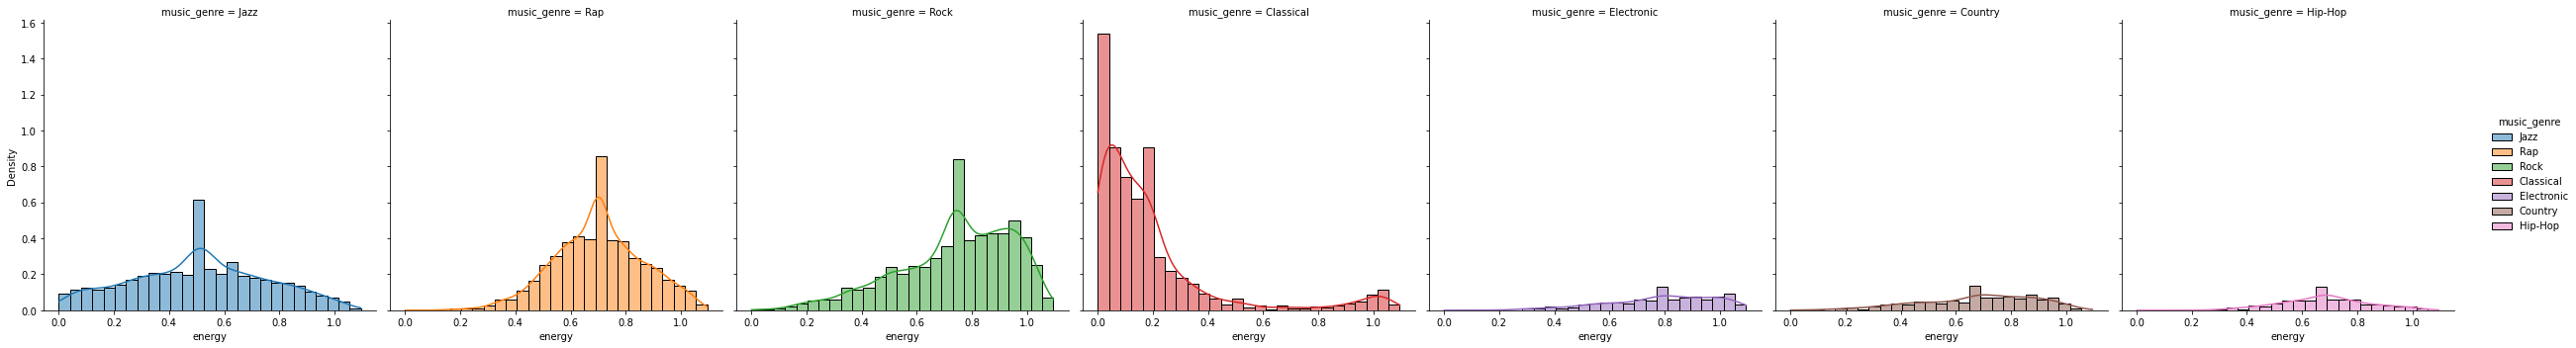

In [50]:
sns.displot(df, x='energy', kde='True')
sns.displot(df, x="energy", col="music_genre", hue='music_genre', stat='density', kde='True')

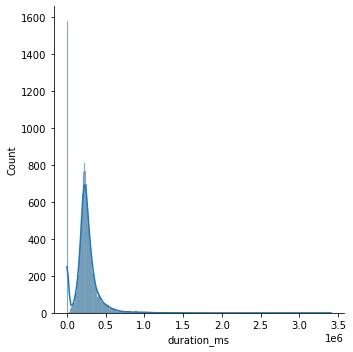

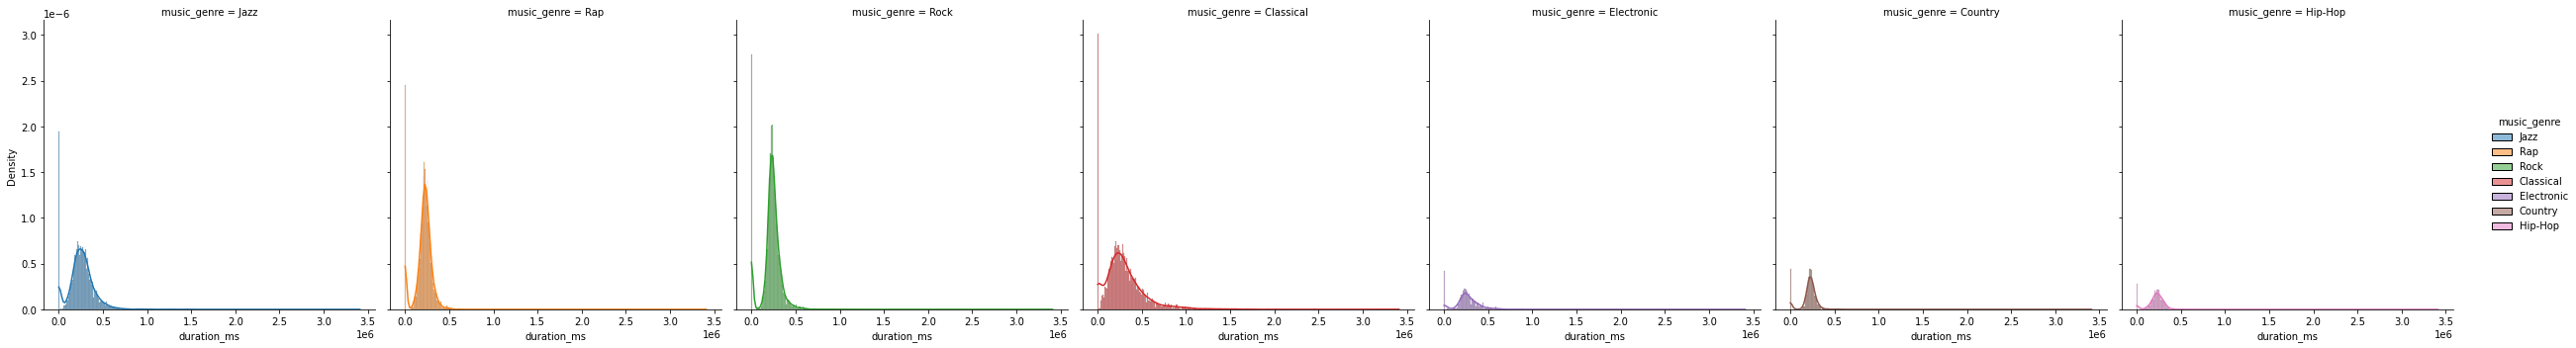

In [51]:
sns.displot(df, x='duration_ms', kde=True)
sns.displot(df, x="duration_ms", col="music_genre", hue='music_genre', stat='density', kde='True')

In [52]:
df.duration_ms = df.duration_ms.replace(-1, 0)

In [53]:
df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].mean())

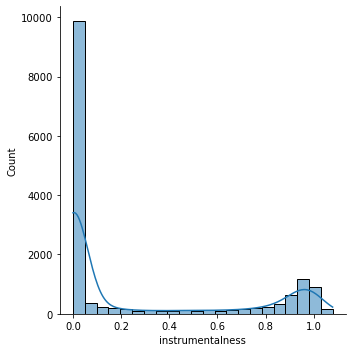

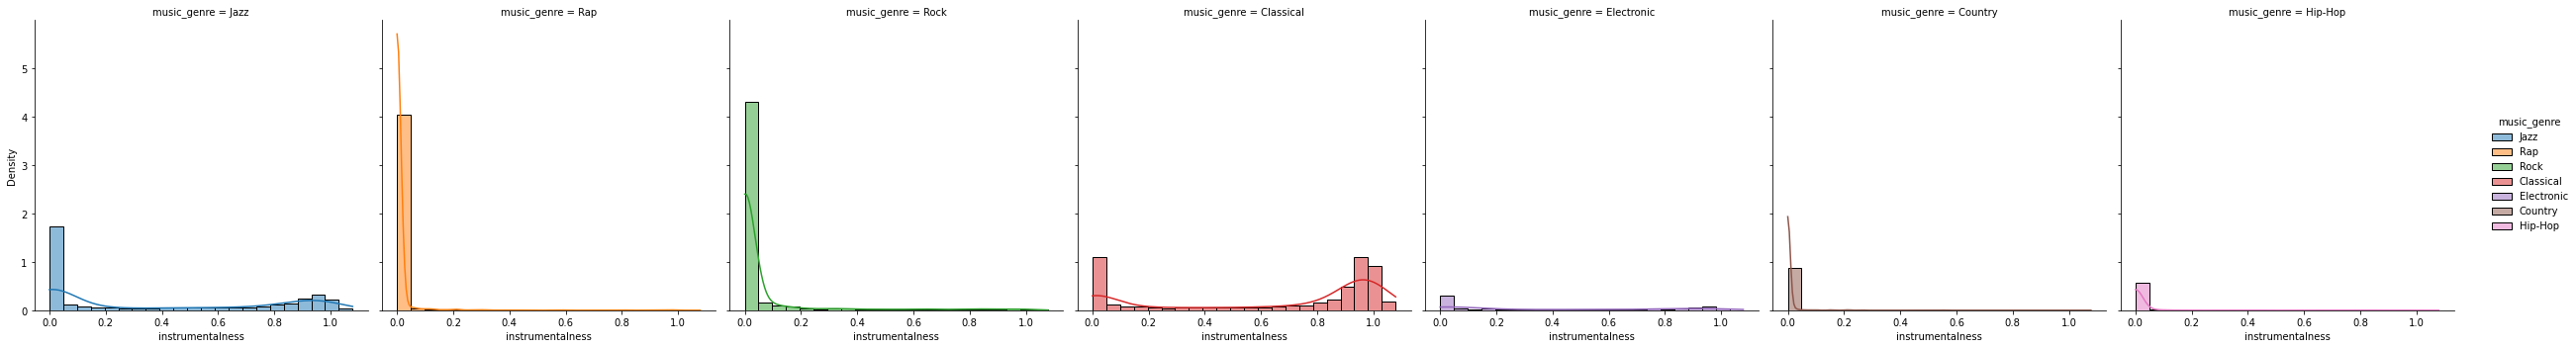

In [54]:
sns.displot(df, x='instrumentalness', kde=True)
sns.displot(df, x="instrumentalness", col="music_genre", hue='music_genre', stat='density', kde='True')

In [55]:
df3 = df[['instrumentalness', 'music_genre']]
df3 = df3[df3.instrumentalness>0]

In [56]:
jazz_instrumentalness_mean = float(df3[df3.music_genre == 'Jazz'].mean())
jazz_instrumentalness_mean

0.42031635811510304

In [57]:
rap_instrumentalness_mean = float(df3[df3.music_genre == 'Rap'].mean())
rap_instrumentalness_mean

0.02596080232440997

In [58]:
rock_instrumentalness_mean = float(df3[df3.music_genre == 'Rock'].mean())
rock_instrumentalness_mean

0.08360982340812116

In [59]:
classical_instrumentalness_mean = float(df3[df3.music_genre == 'Classical'].mean())
classical_instrumentalness_mean

0.6734085921290611

In [60]:
electronic_instrumentalness_mean = float(df3[df3.music_genre == 'Electronic'].mean())
electronic_instrumentalness_mean

0.40094918810281077

In [61]:
country_instrumentalness_mean = float(df3[df3.music_genre == 'Country'].mean())
country_instrumentalness_mean

0.009629117956023447

In [62]:
hip_hop_instrumentalness_mean = float(df3[df3.music_genre == 'Hip-Hop'].mean())
hip_hop_instrumentalness_mean

0.037599391402533655

In [63]:
def impute_instrumentalness(cols):
  instrumentalness = cols[0]
  music_genre = cols[1]
  
  if pd.isnull(instrumentalness) or instrumentalness < 0:
    if music_genre == 'Jazz':
      return jazz_instrumentalness_mean
    if music_genre == 'Rap':
      return rap_instrumentalness_mean
    if music_genre == 'Rock':
      return rock_instrumentalness_mean
    if music_genre == 'Classical':
      return classical_instrumentalness_mean
    if music_genre == 'Electronic':
      return electronic_instrumentalness_mean
    if music_genre == 'Country':
      return country_instrumentalness_mean
    if music_genre == 'Hip-Hop':
      return hip_hop_instrumentalness_mean
  else:
    return instrumentalness
    
# df['popularity'] = df[['popularity', 'music_genre']].apply(impute_pop, axis=1)  
df['instrumentalness'] = df[['instrumentalness', 'music_genre']].apply(impute_instrumentalness, axis=1) 
df

instance_id                             track_name  popularity  \
0      MSC_83537.0                  Estrellitas y Duendes      49.178   
1      MSC_22044.0                               Al Norte      59.827   
2      MSC_62017.0       Yeah! (feat. Lil Jon & Ludacris)      89.023   
3      MSC_76365.0                          Can’t You See      55.762   
4      MSC_71493.0  Sonata III (G Moll), BWV 1029: Adagio      45.095   
...            ...                                    ...         ...   
15676  MSC_73047.0                             I. Andante       0.000   
15677  MSC_34472.0                  Only Trust Your Heart      40.514   
15678  MSC_32827.0                        Moment's Notice      35.082   
15679  MSC_89976.0                      Such Small Scenes      59.693   
15680  MSC_43297.0                            Dogs of War      56.518   

       acousticness  danceability  duration_ms    energy  instrumentalness  \
0          0.970522      0.580508   214625.776  0.192107          0.000000   
1          1.009380      0.687542   216232.195  0.265942          0.000031   
2          0.020041      0.967948   273314.723  0.857411          0.000000   
3          0.010284      0.616287   189189.605  0.970513          0.000220   
4          0.858769      0.280645   410136.987  0.114732          0.002753   
...             ...           ...          ...       ...               ...   
15676      0.866988      0.387476        0.000  0.196799          0.028725   
15677      0.883333      0.459917   378128.464  0.349263          0.000519   
15678      0.905281      0.566619   581799.061  0.543673          0.209238   
15679      0.113408      0.644554   151226.592  0.912201          0.000089   
15680      0.847136      0.502160   190735.191  0.470057          0.502878   

                 key  liveness  loudness voice_gender   mode  speechiness  \
0            Scale E  0.147134   -14.140          NaN  Major     0.046404   
1            Scale A  0.174655   -13.716         Male    NaN     0.039949   
2            Scale D  0.042030    -4.995       Female  Major     0.119917   
3            Scale D  0.124637    -4.262         Both  Major     0.167493   
4      Scale F Sharp  0.134782   -26.922       Female  Minor     0.039139   
...              ...       ...       ...          ...    ...          ...   
15676        Scale B  0.248399   -16.331       Female  Major     0.045251   
15677        Scale F  0.681492   -25.087         Both  Major     0.448377   
15678  Scale D Sharp  0.416611   -10.246       Female  Major     0.040625   
15679        Scale F  0.166336    -7.257         Both  Minor     0.060308   
15680        Scale F  0.143114   -11.043       Female  Major     0.029906   

                    tempo musician_category   valence music_genre  
0      143.78799999999998              Band  0.598965        Jazz  
1                     NaN              Band  0.357194        Jazz  
2      105.01799999999999              Band  0.635525         Rap  
3                     NaN              Duet  0.983750        Rock  
4      112.18299999999999              Band  0.074412   Classical  
...                   ...               ...       ...         ...  
15676             123.516              Band  0.624518   Classical  
15677             129.445              Duet  0.609022        Jazz  
15678              123.17               NaN  0.869294        Jazz  
15679  116.07700000000001              Duet  0.402700        Rock  
15680                94.2              Solo  0.358777   Classical  

[15681 rows x 18 columns]

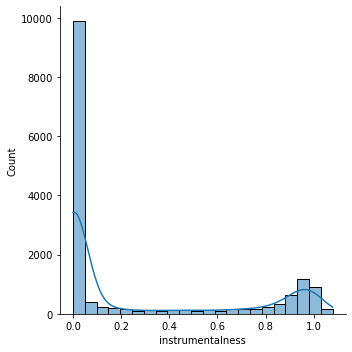

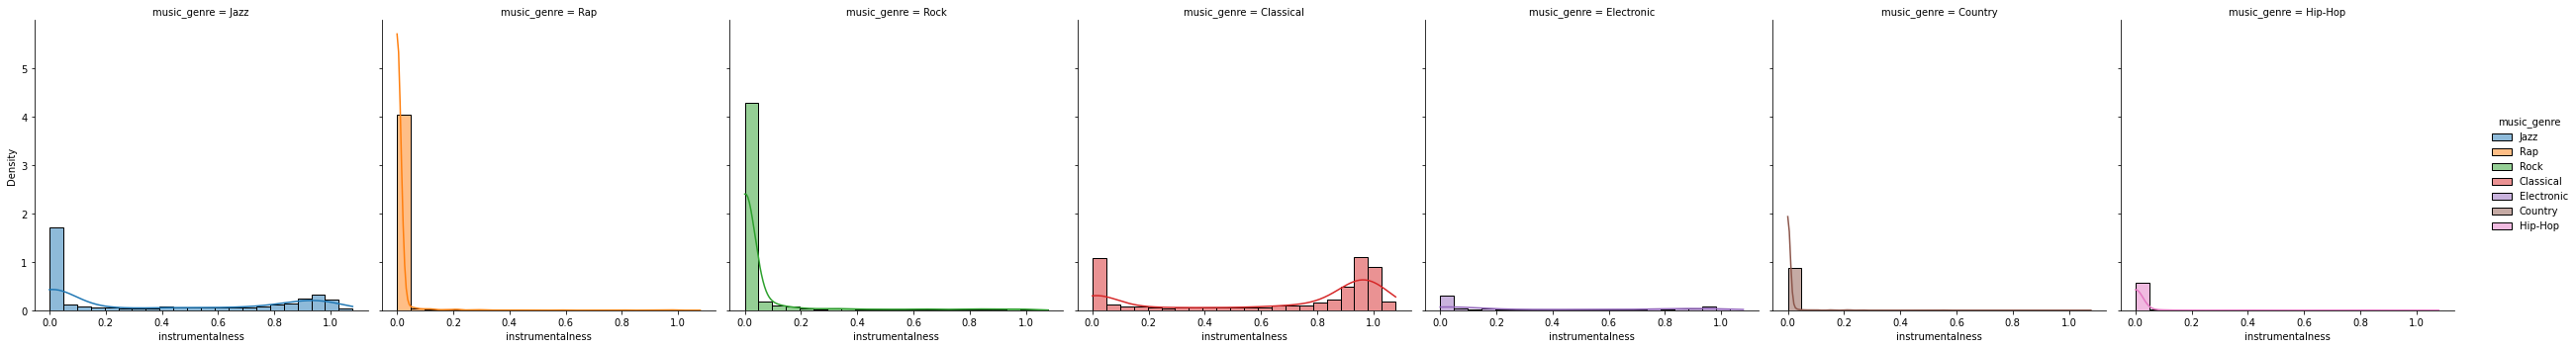

In [64]:
sns.displot(df, x='instrumentalness', kde=True)
sns.displot(df, x="instrumentalness", col="music_genre", hue='music_genre', stat='density', kde='True')

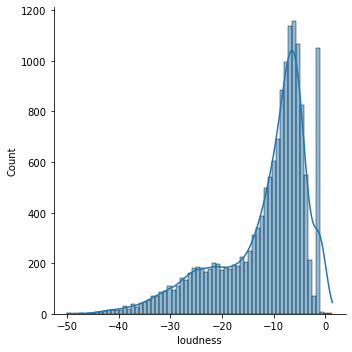

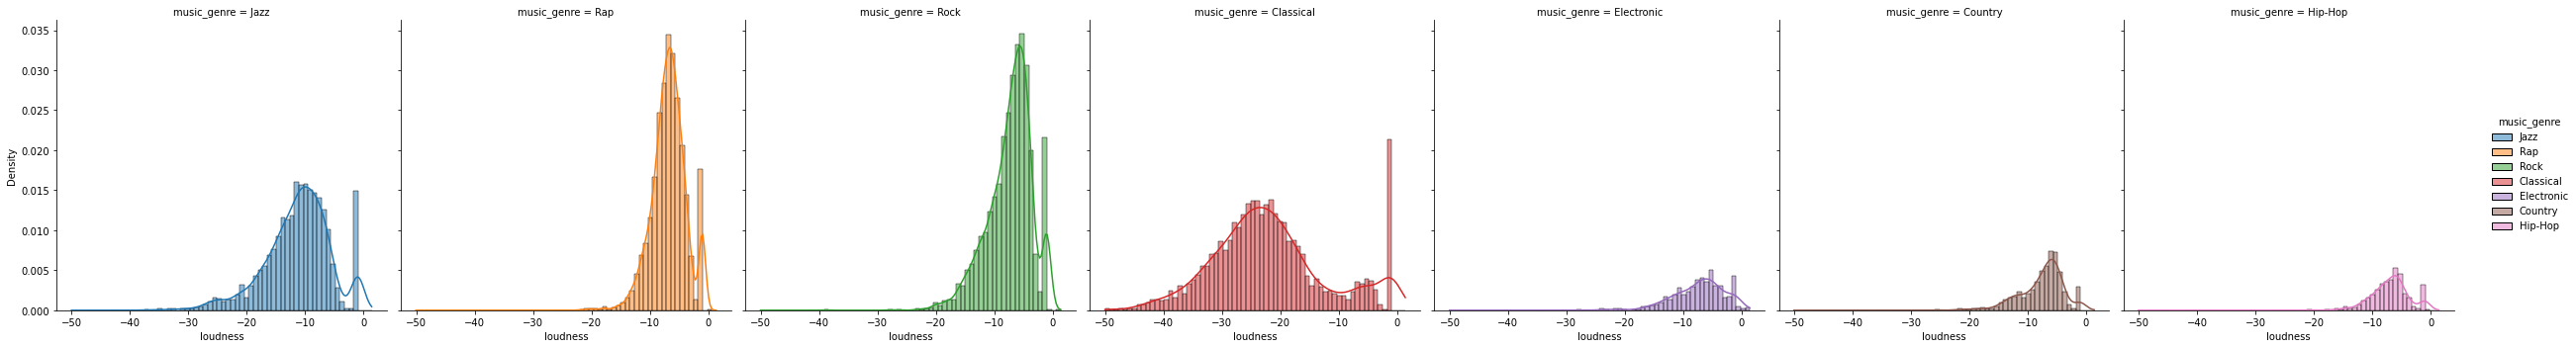

In [65]:
sns.displot(df, x='loudness', kde=True)
sns.displot(df, x="loudness", col="music_genre", hue='music_genre', stat='density', kde='True')

In [66]:
# a = (df['loudness'].min() - df['loudness'])/(df['loudness'].min()- df['loudness'].max())

def impute_loudness(cols):
  loudness = cols[0]
  music_genre = cols[1]

  if pd.isnull(loudness):
    if music_genre == 'Jazz':
      return float(df4[df4.music_genre == 'Jazz'].mean())
    if music_genre == 'Rap':
      return float(df4[df4.music_genre == 'Rap'].mean())
    if music_genre == 'Rock':
      return float(df4[df4.music_genre == 'Rock'].mean())
    if music_genre == 'Classical':
      return float(df4[df4.music_genre == 'Classical'].mean())
    if music_genre == 'Electronic':
      return float(df4[df4.music_genre == 'Electronic'].mean())
    if music_genre == 'Country':
      return float(df4[df4.music_genre == 'Country'].mean())
    if music_genre == 'Hip-Hop':
      return float(df4[df4.music_genre == 'Hip-Hop'].mean())
  else:
    return loudness
df4 = df[['loudness', 'music_genre']]
df['loudness'] = df[['loudness', 'music_genre']].apply(impute_loudness, axis=1) 

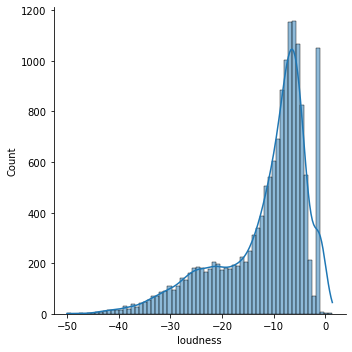

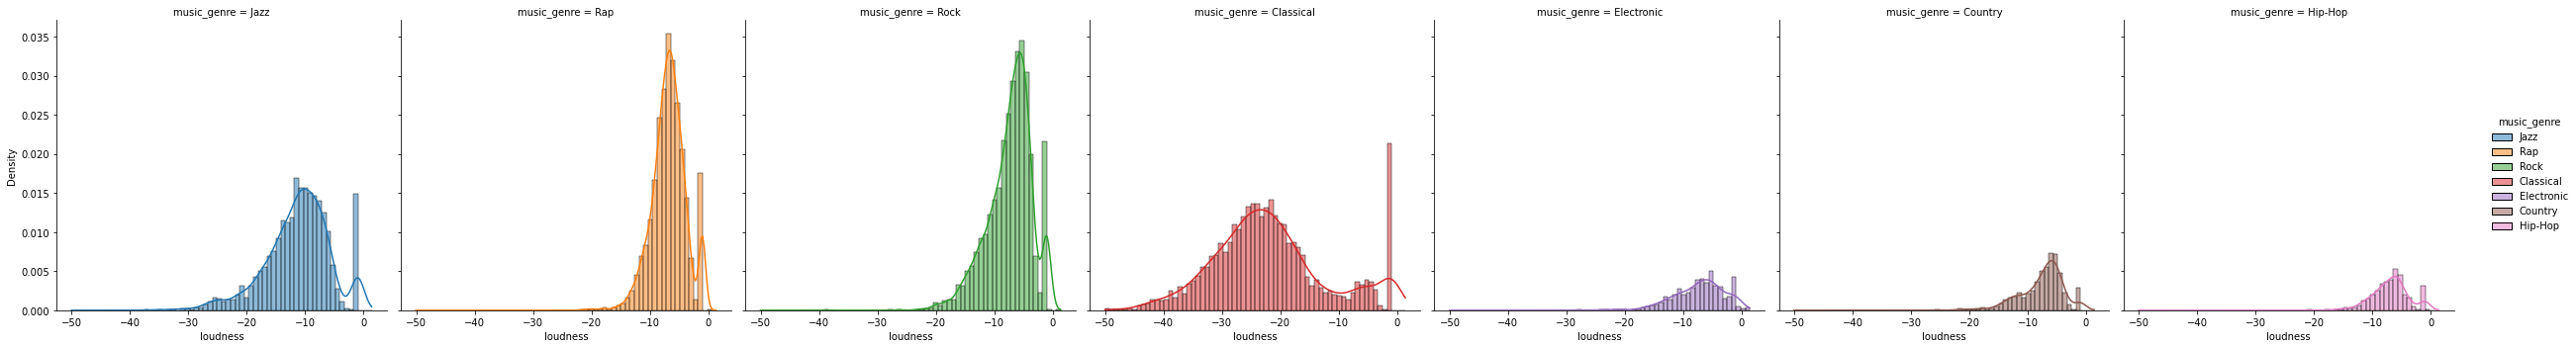

In [67]:
sns.displot(df, x='loudness', kde=True)
sns.displot(df, x="loudness", col="music_genre", hue='music_genre', stat='density', kde='True')

In [68]:
df['speechiness'].describe()

count    15655.000000
mean         0.096411
std          0.105647
min          0.023858
25%          0.039549
50%          0.050425
75%          0.094230
max          1.000445
Name: speechiness, dtype: float64

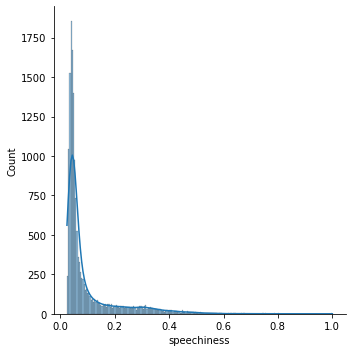

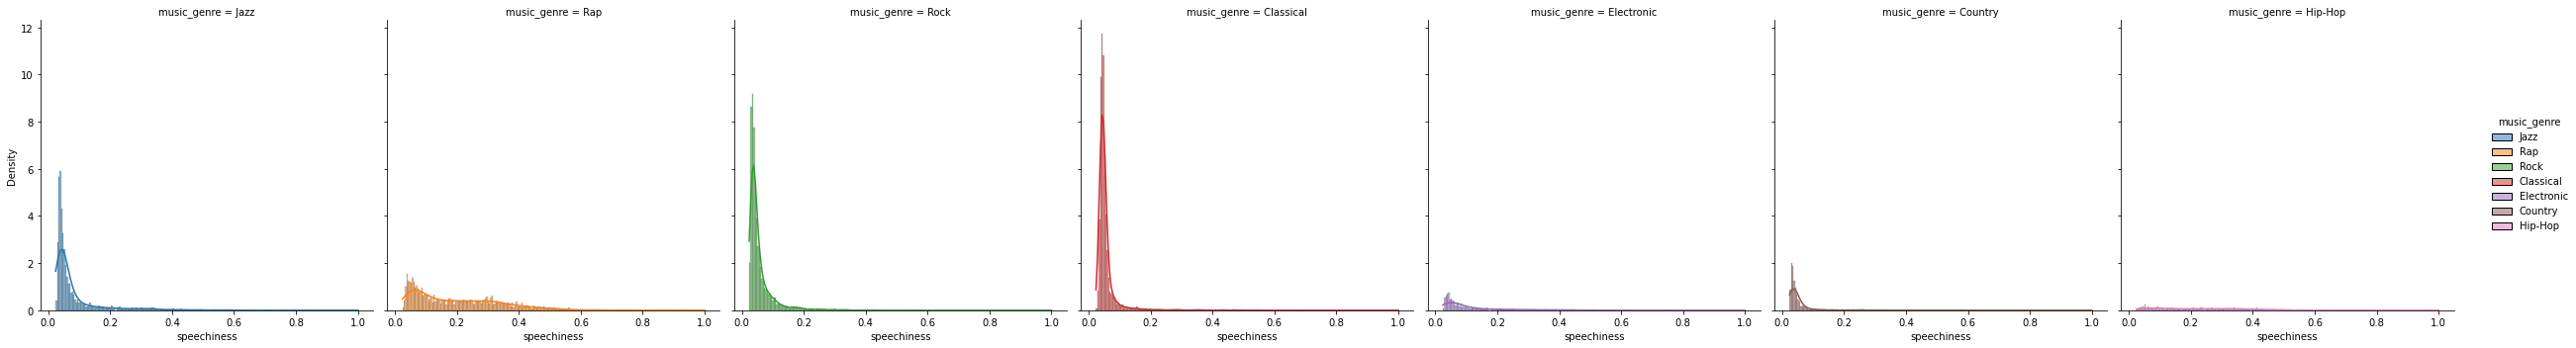

In [69]:
# sns.catplot(x="voice_gender", y='popularity', kind="bar", palette="pastel", data=df, hue='music_genre', col='music_genre')
sns.displot(df, x='speechiness', kde=True)
sns.displot(df, x="speechiness", col="music_genre", hue='music_genre', stat='density', kde='True')

In [70]:
def impute_speechiness(cols):
  speechiness = cols[0]
  music_genre = cols[1]

  if pd.isnull(speechiness):
    if music_genre == 'Jazz':
      return float(df5[df5.music_genre == 'Jazz'].mean())
    if music_genre == 'Rap':
      return float(df5[df5.music_genre == 'Rap'].mean())
    if music_genre == 'Rock':
      return float(df5[df5.music_genre == 'Rock'].mean())
    if music_genre == 'Classical':
      return float(df5[df5.music_genre == 'Classical'].mean())
    if music_genre == 'Electronic':
      return float(df5[df5.music_genre == 'Electronic'].mean())
    if music_genre == 'Country':
      return float(df5[df5.music_genre == 'Country'].mean())
    if music_genre == 'Hip-Hop':
      return float(df5[df5.music_genre == 'Hip-Hop'].mean())
  else:
    return speechiness
df5 = df[['speechiness', 'music_genre']]
df['speechiness'] = df[['speechiness', 'music_genre']].apply(impute_speechiness, axis=1) 

In [71]:
df[['speechiness', 'music_genre']]

speechiness music_genre
0         0.046404        Jazz
1         0.039949        Jazz
2         0.119917         Rap
3         0.167493        Rock
4         0.039139   Classical
...            ...         ...
15676     0.045251   Classical
15677     0.448377        Jazz
15678     0.040625        Jazz
15679     0.060308        Rock
15680     0.029906   Classical

[15681 rows x 2 columns]

In [72]:
df['tempo'] = df['tempo'].astype('float64')
df

instance_id                             track_name  popularity  \
0      MSC_83537.0                  Estrellitas y Duendes      49.178   
1      MSC_22044.0                               Al Norte      59.827   
2      MSC_62017.0       Yeah! (feat. Lil Jon & Ludacris)      89.023   
3      MSC_76365.0                          Can’t You See      55.762   
4      MSC_71493.0  Sonata III (G Moll), BWV 1029: Adagio      45.095   
...            ...                                    ...         ...   
15676  MSC_73047.0                             I. Andante       0.000   
15677  MSC_34472.0                  Only Trust Your Heart      40.514   
15678  MSC_32827.0                        Moment's Notice      35.082   
15679  MSC_89976.0                      Such Small Scenes      59.693   
15680  MSC_43297.0                            Dogs of War      56.518   

       acousticness  danceability  duration_ms    energy  instrumentalness  \
0          0.970522      0.580508   214625.776  0.192107          0.000000   
1          1.009380      0.687542   216232.195  0.265942          0.000031   
2          0.020041      0.967948   273314.723  0.857411          0.000000   
3          0.010284      0.616287   189189.605  0.970513          0.000220   
4          0.858769      0.280645   410136.987  0.114732          0.002753   
...             ...           ...          ...       ...               ...   
15676      0.866988      0.387476        0.000  0.196799          0.028725   
15677      0.883333      0.459917   378128.464  0.349263          0.000519   
15678      0.905281      0.566619   581799.061  0.543673          0.209238   
15679      0.113408      0.644554   151226.592  0.912201          0.000089   
15680      0.847136      0.502160   190735.191  0.470057          0.502878   

                 key  liveness  loudness voice_gender   mode  speechiness  \
0            Scale E  0.147134   -14.140          NaN  Major     0.046404   
1            Scale A  0.174655   -13.716         Male    NaN     0.039949   
2            Scale D  0.042030    -4.995       Female  Major     0.119917   
3            Scale D  0.124637    -4.262         Both  Major     0.167493   
4      Scale F Sharp  0.134782   -26.922       Female  Minor     0.039139   
...              ...       ...       ...          ...    ...          ...   
15676        Scale B  0.248399   -16.331       Female  Major     0.045251   
15677        Scale F  0.681492   -25.087         Both  Major     0.448377   
15678  Scale D Sharp  0.416611   -10.246       Female  Major     0.040625   
15679        Scale F  0.166336    -7.257         Both  Minor     0.060308   
15680        Scale F  0.143114   -11.043       Female  Major     0.029906   

         tempo musician_category   valence music_genre  
0      143.788              Band  0.598965        Jazz  
1          NaN              Band  0.357194        Jazz  
2      105.018              Band  0.635525         Rap  
3          NaN              Duet  0.983750        Rock  
4      112.183              Band  0.074412   Classical  
...        ...               ...       ...         ...  
15676  123.516              Band  0.624518   Classical  
15677  129.445              Duet  0.609022        Jazz  
15678  123.170               NaN  0.869294        Jazz  
15679  116.077              Duet  0.402700        Rock  
15680   94.200              Solo  0.358777   Classical  

[15681 rows x 18 columns]

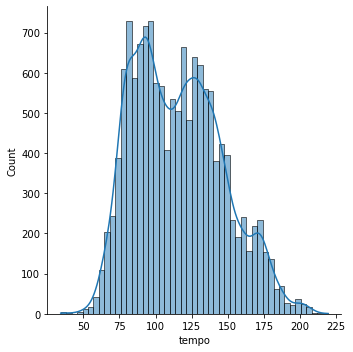

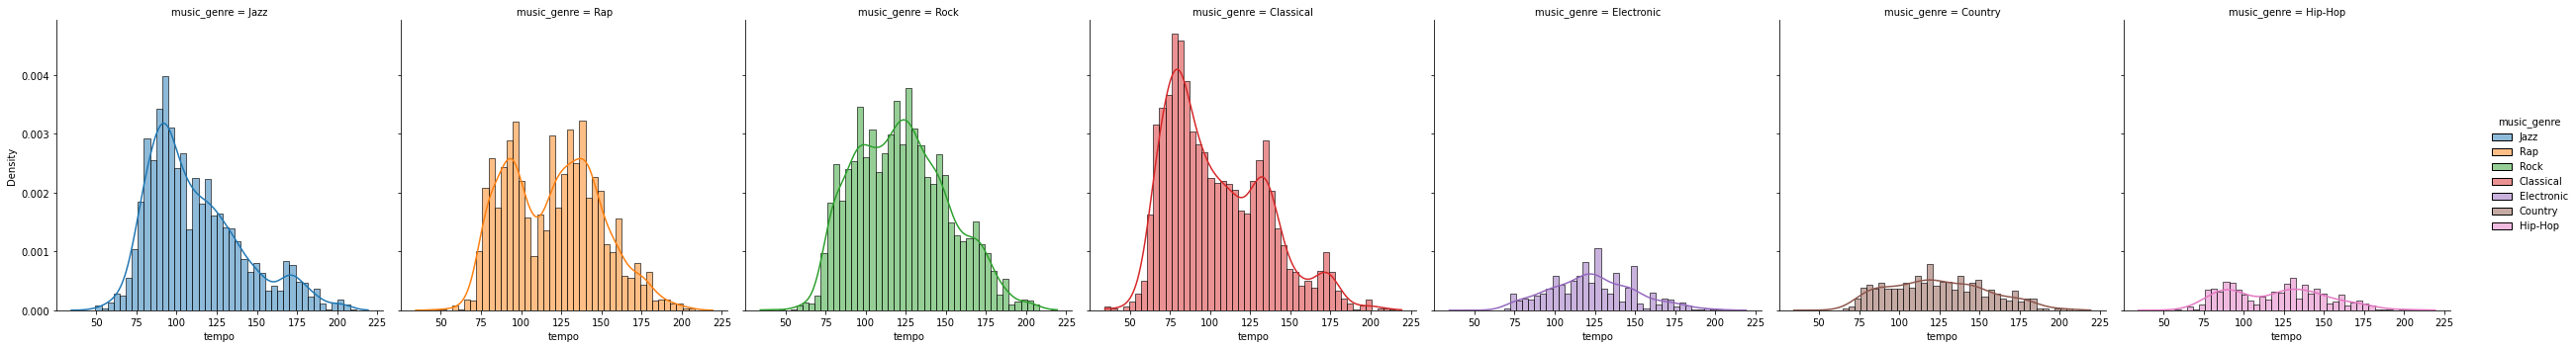

In [73]:
sns.displot(df, x='tempo', kde=True)
sns.displot(df, x="tempo", col="music_genre", hue='music_genre', stat='density', kde='True')

In [74]:
def impute_tempo(cols):
  tempo = cols[0]
  music_genre = cols[1]

  if pd.isnull(tempo):
    if music_genre == 'Jazz':
      return float(df6[df6.music_genre == 'Jazz'].median())
    if music_genre == 'Rap':
      return float(df6[df6.music_genre == 'Rap'].median())
    if music_genre == 'Rock':
      return float(df6[df6.music_genre == 'Rock'].median())
    if music_genre == 'Classical':
      return float(df6[df6.music_genre == 'Classical'].median())
    if music_genre == 'Electronic':
      return float(df6[df6.music_genre == 'Electronic'].median())
    if music_genre == 'Country':
      return float(df6[df6.music_genre == 'Country'].median())
    if music_genre == 'Hip-Hop':
      return float(df6[df6.music_genre == 'Hip-Hop'].median())
  else:
    return tempo

df6 = df[['tempo', 'music_genre']]
df['tempo'] = df[['tempo', 'music_genre']].apply(impute_tempo, axis=1) 

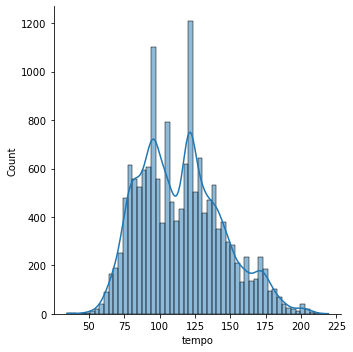

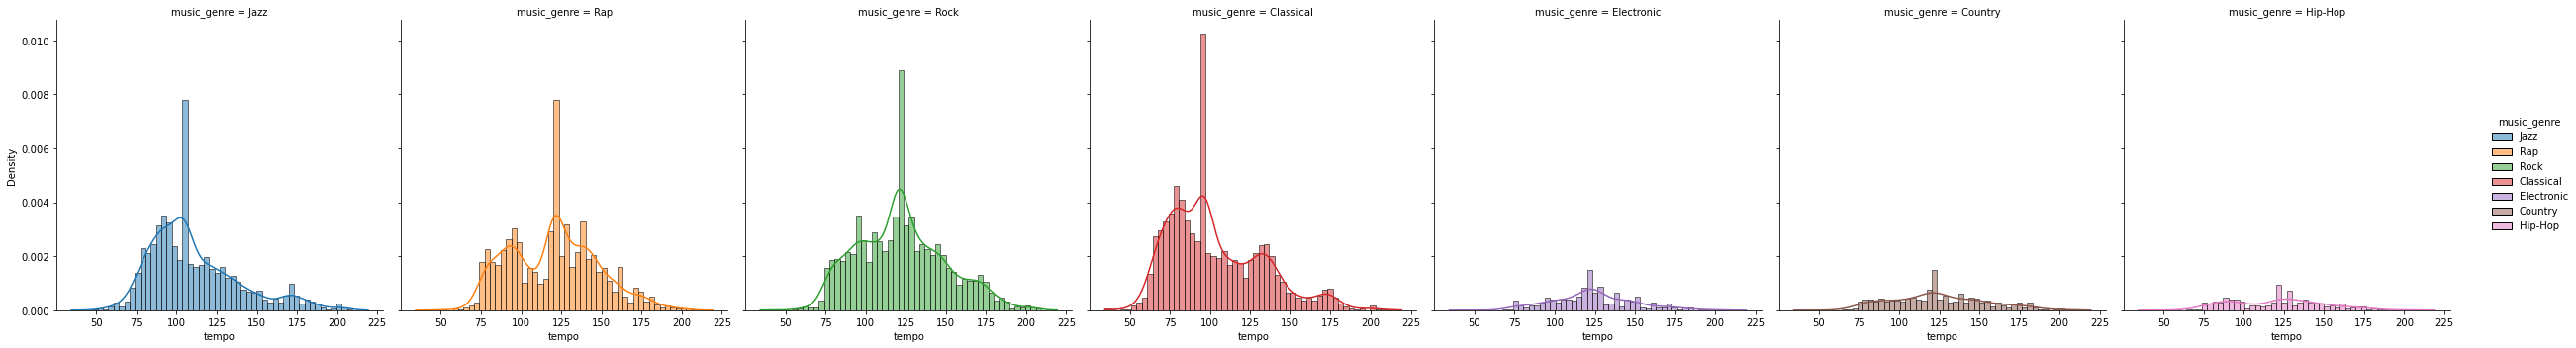

In [75]:
sns.displot(df, x='tempo', kde=True)
sns.displot(df, x="tempo", col="music_genre", hue='music_genre', stat='density', kde='True')

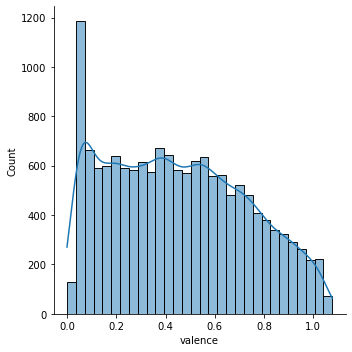

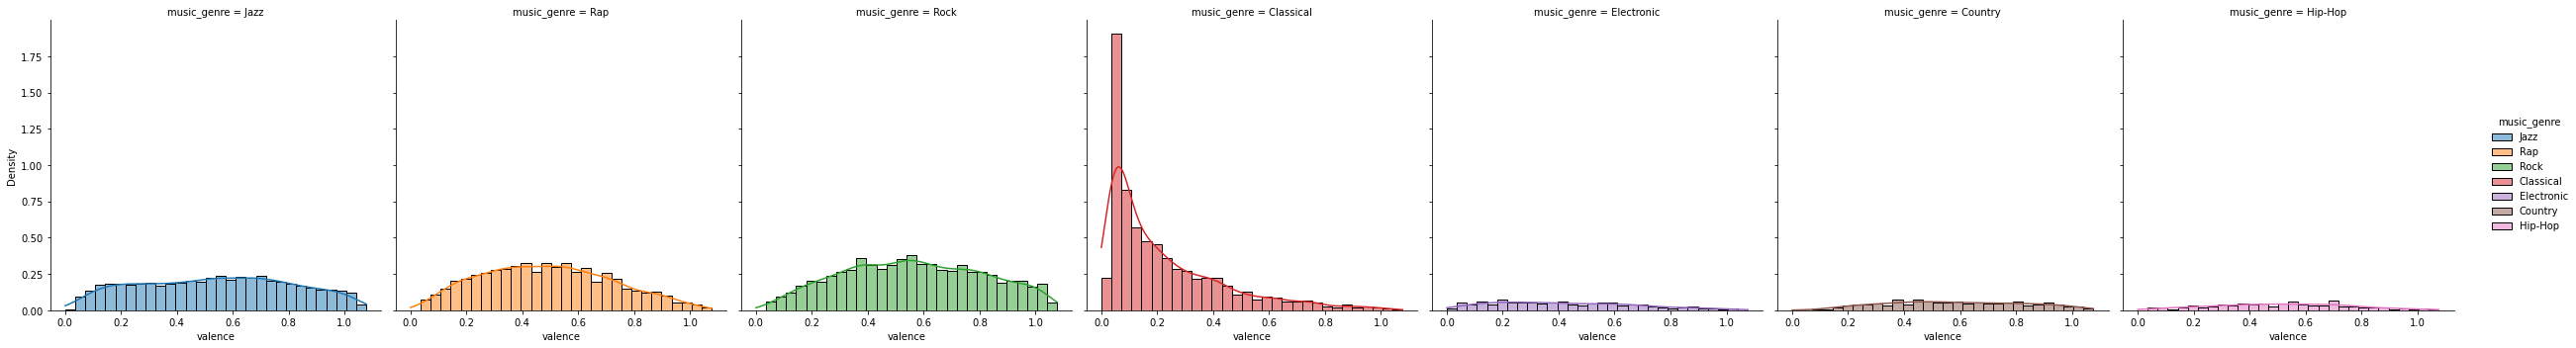

In [76]:
sns.displot(df, x='valence', kde=True)
sns.displot(df, x='valence', col="music_genre", hue='music_genre', stat='density', kde='True')

In [77]:
def impute_valence(cols):
  valence = cols[0]
  music_genre = cols[1]

  if pd.isnull(valence):
    if music_genre == 'Jazz':
      return float(df6[df6.music_genre == 'Jazz'].mean())
    if music_genre == 'Rap':
      return float(df6[df6.music_genre == 'Rap'].mean())
    if music_genre == 'Rock':
      return float(df6[df6.music_genre == 'Rock'].mean())
    if music_genre == 'Classical':
      return float(df6[df6.music_genre == 'Classical'].mean())
    if music_genre == 'Electronic':
      return float(df6[df6.music_genre == 'Electronic'].mean())
    if music_genre == 'Country':
      return float(df6[df6.music_genre == 'Country'].mean())
    if music_genre == 'Hip-Hop':
      return float(df6[df6.music_genre == 'Hip-Hop'].mean())
  else:
    return valence

df6 = df[['valence', 'music_genre']]
df['valence'] = df[['valence', 'music_genre']].apply(impute_valence, axis=1) 

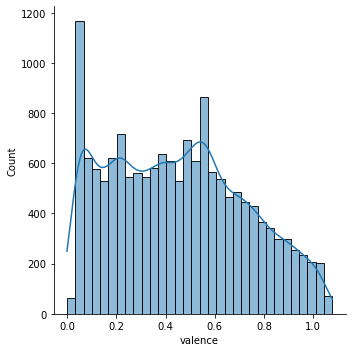

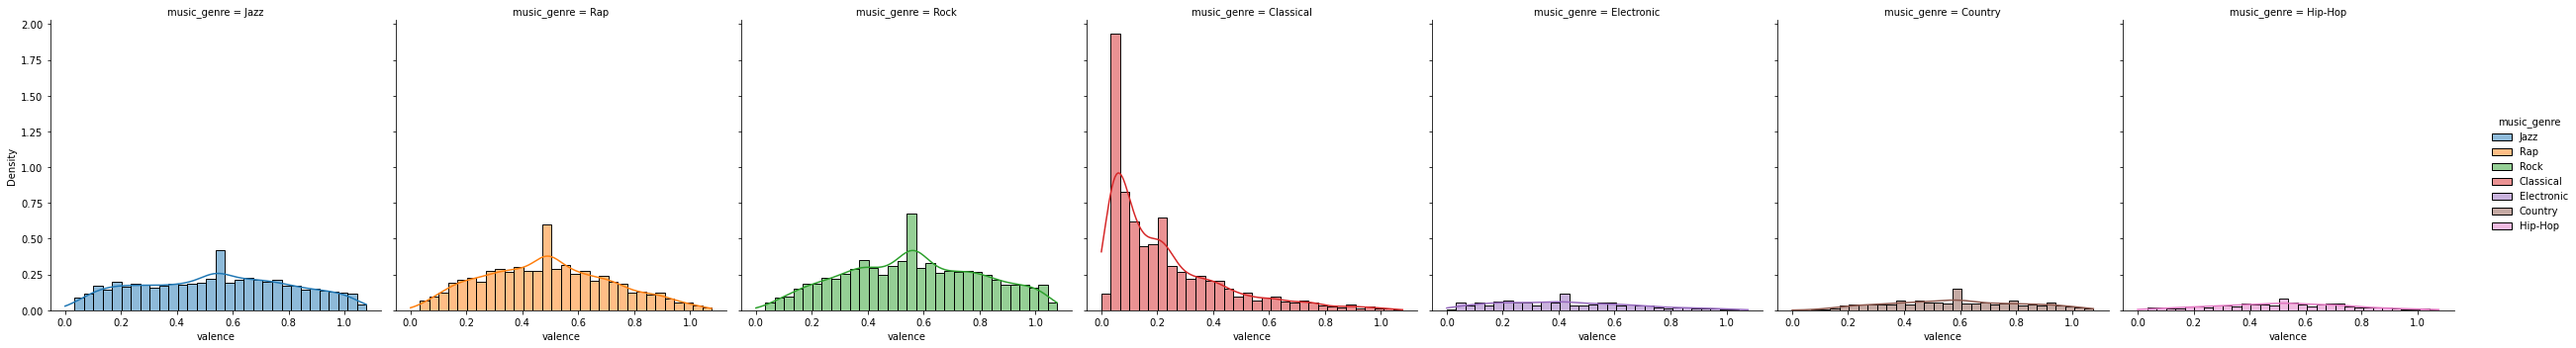

In [78]:
sns.displot(df, x='valence', kde=True)
sns.displot(df, x='valence', col="music_genre", hue='music_genre', stat='density', kde='True')

In [79]:
df.isnull().sum()

instance_id             0
track_name              0
popularity              0
acousticness            0
danceability            0
duration_ms             0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
voice_gender          765
mode                 1114
speechiness             0
tempo                   0
musician_category    1360
valence                 0
music_genre             0
dtype: int64

In [80]:
df

instance_id                             track_name  popularity  \
0      MSC_83537.0                  Estrellitas y Duendes      49.178   
1      MSC_22044.0                               Al Norte      59.827   
2      MSC_62017.0       Yeah! (feat. Lil Jon & Ludacris)      89.023   
3      MSC_76365.0                          Can’t You See      55.762   
4      MSC_71493.0  Sonata III (G Moll), BWV 1029: Adagio      45.095   
...            ...                                    ...         ...   
15676  MSC_73047.0                             I. Andante       0.000   
15677  MSC_34472.0                  Only Trust Your Heart      40.514   
15678  MSC_32827.0                        Moment's Notice      35.082   
15679  MSC_89976.0                      Such Small Scenes      59.693   
15680  MSC_43297.0                            Dogs of War      56.518   

       acousticness  danceability  duration_ms    energy  instrumentalness  \
0          0.970522      0.580508   214625.776  0.192107          0.000000   
1          1.009380      0.687542   216232.195  0.265942          0.000031   
2          0.020041      0.967948   273314.723  0.857411          0.000000   
3          0.010284      0.616287   189189.605  0.970513          0.000220   
4          0.858769      0.280645   410136.987  0.114732          0.002753   
...             ...           ...          ...       ...               ...   
15676      0.866988      0.387476        0.000  0.196799          0.028725   
15677      0.883333      0.459917   378128.464  0.349263          0.000519   
15678      0.905281      0.566619   581799.061  0.543673          0.209238   
15679      0.113408      0.644554   151226.592  0.912201          0.000089   
15680      0.847136      0.502160   190735.191  0.470057          0.502878   

                 key  liveness  loudness voice_gender   mode  speechiness  \
0            Scale E  0.147134   -14.140          NaN  Major     0.046404   
1            Scale A  0.174655   -13.716         Male    NaN     0.039949   
2            Scale D  0.042030    -4.995       Female  Major     0.119917   
3            Scale D  0.124637    -4.262         Both  Major     0.167493   
4      Scale F Sharp  0.134782   -26.922       Female  Minor     0.039139   
...              ...       ...       ...          ...    ...          ...   
15676        Scale B  0.248399   -16.331       Female  Major     0.045251   
15677        Scale F  0.681492   -25.087         Both  Major     0.448377   
15678  Scale D Sharp  0.416611   -10.246       Female  Major     0.040625   
15679        Scale F  0.166336    -7.257         Both  Minor     0.060308   
15680        Scale F  0.143114   -11.043       Female  Major     0.029906   

          tempo musician_category   valence music_genre  
0      143.7880              Band  0.598965        Jazz  
1      104.5115              Band  0.357194        Jazz  
2      105.0180              Band  0.635525         Rap  
3      120.7480              Duet  0.983750        Rock  
4      112.1830              Band  0.074412   Classical  
...         ...               ...       ...         ...  
15676  123.5160              Band  0.624518   Classical  
15677  129.4450              Duet  0.609022        Jazz  
15678  123.1700               NaN  0.869294        Jazz  
15679  116.0770              Duet  0.402700        Rock  
15680   94.2000              Solo  0.358777   Classical  

[15681 rows x 18 columns]

In [81]:
# from sklearn.impute import KNNImputer
# df_knn = df[['popularity', 'acousticness',
#        'danceability', 'duration_ms', 'energy', 'instrumentalness' ,
#        'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
#        'musician_category', 'valence', 'music_genre']]
# cols_backup = df_knn.columns
# df_knn['mode'].fillna('#', inplace=True)  # replace all missing data in desired column with with '#'
# imputer = KNNImputer(missing_values='#')  # tell the imputer to consider only '#' as missing data
# imputed_data = imputer.fit_transform(df_knn)  # impute all '#'
# df_knn = pd.DataFrame(data=imputed_data, columns=cols_backup)

In [82]:
df['mode'].replace('#', np.nan, inplace=True)
df

instance_id                             track_name  popularity  \
0      MSC_83537.0                  Estrellitas y Duendes      49.178   
1      MSC_22044.0                               Al Norte      59.827   
2      MSC_62017.0       Yeah! (feat. Lil Jon & Ludacris)      89.023   
3      MSC_76365.0                          Can’t You See      55.762   
4      MSC_71493.0  Sonata III (G Moll), BWV 1029: Adagio      45.095   
...            ...                                    ...         ...   
15676  MSC_73047.0                             I. Andante       0.000   
15677  MSC_34472.0                  Only Trust Your Heart      40.514   
15678  MSC_32827.0                        Moment's Notice      35.082   
15679  MSC_89976.0                      Such Small Scenes      59.693   
15680  MSC_43297.0                            Dogs of War      56.518   

       acousticness  danceability  duration_ms    energy  instrumentalness  \
0          0.970522      0.580508   214625.776  0.192107          0.000000   
1          1.009380      0.687542   216232.195  0.265942          0.000031   
2          0.020041      0.967948   273314.723  0.857411          0.000000   
3          0.010284      0.616287   189189.605  0.970513          0.000220   
4          0.858769      0.280645   410136.987  0.114732          0.002753   
...             ...           ...          ...       ...               ...   
15676      0.866988      0.387476        0.000  0.196799          0.028725   
15677      0.883333      0.459917   378128.464  0.349263          0.000519   
15678      0.905281      0.566619   581799.061  0.543673          0.209238   
15679      0.113408      0.644554   151226.592  0.912201          0.000089   
15680      0.847136      0.502160   190735.191  0.470057          0.502878   

                 key  liveness  loudness voice_gender   mode  speechiness  \
0            Scale E  0.147134   -14.140          NaN  Major     0.046404   
1            Scale A  0.174655   -13.716         Male    NaN     0.039949   
2            Scale D  0.042030    -4.995       Female  Major     0.119917   
3            Scale D  0.124637    -4.262         Both  Major     0.167493   
4      Scale F Sharp  0.134782   -26.922       Female  Minor     0.039139   
...              ...       ...       ...          ...    ...          ...   
15676        Scale B  0.248399   -16.331       Female  Major     0.045251   
15677        Scale F  0.681492   -25.087         Both  Major     0.448377   
15678  Scale D Sharp  0.416611   -10.246       Female  Major     0.040625   
15679        Scale F  0.166336    -7.257         Both  Minor     0.060308   
15680        Scale F  0.143114   -11.043       Female  Major     0.029906   

          tempo musician_category   valence music_genre  
0      143.7880              Band  0.598965        Jazz  
1      104.5115              Band  0.357194        Jazz  
2      105.0180              Band  0.635525         Rap  
3      120.7480              Duet  0.983750        Rock  
4      112.1830              Band  0.074412   Classical  
...         ...               ...       ...         ...  
15676  123.5160              Band  0.624518   Classical  
15677  129.4450              Duet  0.609022        Jazz  
15678  123.1700               NaN  0.869294        Jazz  
15679  116.0770              Duet  0.402700        Rock  
15680   94.2000              Solo  0.358777   Classical  

[15681 rows x 18 columns]

In [83]:
df.isnull().sum()

instance_id             0
track_name              0
popularity              0
acousticness            0
danceability            0
duration_ms             0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
voice_gender          765
mode                 1114
speechiness             0
tempo                   0
musician_category    1360
valence                 0
music_genre             0
dtype: int64

In [84]:
df['mode'] = df['mode'].fillna(df['mode'].mode()[0])

In [85]:
df[(pd.isnull(df.voice_gender)) & (pd.isnull(df.musician_category))]

instance_id                                         track_name  \
310    MSC_65555.0                                    Man On The Moon   
921    MSC_73492.0                          The Washington Post March   
1218   MSC_74961.0                                     Loud and Heavy   
1254   MSC_77291.0                 Please Please Me - Remastered 2009   
1392   MSC_57007.0           Stay as Sweet as You Are (arr. A. Tatum)   
...            ...                                                ...   
15201  MSC_35891.0                                          Tick Tock   
15432  MSC_80531.0    Chrono Trigger & Chrono Cross (Live from Paris)   
15439  MSC_20436.0                                              Young   
15534  MSC_88490.0                                  Shit Hits The Fan   
15644  MSC_25311.0  Bach, JS : Well-Tempered Clavier Book 1 : Prel...   

       popularity  acousticness  danceability  duration_ms    energy  \
310        71.278      0.456308      0.720642   332861.380  0.758530   
921        30.343      0.807321      0.576833        0.000  0.246439   
1218       70.793      0.000563      0.539189   242646.200  0.739994   
1254       66.765      0.356350      0.578931   130338.729  0.525244   
1392       38.243      1.062907      0.560370        0.000  0.222988   
...           ...           ...           ...          ...       ...   
15201      38.111      0.563294      0.800816   262581.134  0.510191   
15432      29.102      0.925718      0.240466   315388.919  0.522384   
15439      58.365      0.001915      0.556380   213931.670  1.007679   
15534      64.290      0.040784      0.864160   316823.753  0.966487   
15644      28.554      1.050866      0.328367    77509.685  0.124582   

       instrumentalness            key  liveness  loudness voice_gender  \
310            0.000482        Scale G  0.220924    -8.292          NaN   
921            0.994689        Scale C  0.179105   -19.298          NaN   
1218           0.000002        Scale C  0.098174    -6.326          NaN   
1254           0.000000        Scale E  0.074602   -10.353          NaN   
1392           0.990756  Scale F Sharp  0.114322   -19.074          NaN   
...                 ...            ...       ...       ...          ...   
15201          0.912890        Scale F  0.109911    -8.866          NaN   
15432          0.997574        Scale E  0.758286   -12.130          NaN   
15439          0.000000        Scale C  0.646195    -4.717          NaN   
15534          0.007425  Scale C Sharp  0.319423    -1.038          NaN   
15644          0.971785        Scale D  0.110258   -25.034          NaN   

        mode  speechiness     tempo musician_category   valence music_genre  
310    Major     0.027649  118.5670               NaN  0.700748        Rock  
921    Major     0.035209   96.4265               NaN  0.272473   Classical  
1218   Minor     0.029830   81.9780               NaN  0.620071        Rock  
1254   Major     0.030767  139.3880               NaN  0.759615        Rock  
1392   Major     0.040424   61.9080               NaN  0.797304        Jazz  
...      ...          ...       ...               ...       ...         ...  
15201  Major     0.060950   85.2470               NaN  0.794822        Jazz  
15432  Minor     0.047401  113.1770               NaN  0.185560   Classical  
15439  Minor     0.085534  134.1190               NaN  0.445635         Rap  
15534  Major     0.199008   91.9790               NaN  0.614384         Rap  
15644  Major     0.038544   72.2020               NaN  0.891476   Classical  

[64 rows x 18 columns]

In [86]:
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

for col in ['key', 'voice_gender', 'musician_category', 'mode', 'music_genre']:
  df[col] = encode(df[col])

df

C:\Users\advay\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\advay\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\advay\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

instance_id                             track_name  popularity  \
0      MSC_83537.0                  Estrellitas y Duendes      49.178   
1      MSC_22044.0                               Al Norte      59.827   
2      MSC_62017.0       Yeah! (feat. Lil Jon & Ludacris)      89.023   
3      MSC_76365.0                          Can’t You See      55.762   
4      MSC_71493.0  Sonata III (G Moll), BWV 1029: Adagio      45.095   
...            ...                                    ...         ...   
15676  MSC_73047.0                             I. Andante       0.000   
15677  MSC_34472.0                  Only Trust Your Heart      40.514   
15678  MSC_32827.0                        Moment's Notice      35.082   
15679  MSC_89976.0                      Such Small Scenes      59.693   
15680  MSC_43297.0                            Dogs of War      56.518   

       acousticness  danceability  duration_ms    energy  instrumentalness  \
0          0.970522      0.580508   214625.776  0.192107          0.000000   
1          1.009380      0.687542   216232.195  0.265942          0.000031   
2          0.020041      0.967948   273314.723  0.857411          0.000000   
3          0.010284      0.616287   189189.605  0.970513          0.000220   
4          0.858769      0.280645   410136.987  0.114732          0.002753   
...             ...           ...          ...       ...               ...   
15676      0.866988      0.387476        0.000  0.196799          0.028725   
15677      0.883333      0.459917   378128.464  0.349263          0.000519   
15678      0.905281      0.566619   581799.061  0.543673          0.209238   
15679      0.113408      0.644554   151226.592  0.912201          0.000089   
15680      0.847136      0.502160   190735.191  0.470057          0.502878   

       key  liveness  loudness voice_gender  mode  speechiness     tempo  \
0      7.0  0.147134   -14.140          NaN   0.0     0.046404  143.7880   
1      0.0  0.174655   -13.716          2.0   0.0     0.039949  104.5115   
2      5.0  0.042030    -4.995          1.0   0.0     0.119917  105.0180   
3      5.0  0.124637    -4.262          0.0   0.0     0.167493  120.7480   
4      9.0  0.134782   -26.922          1.0   1.0     0.039139  112.1830   
...    ...       ...       ...          ...   ...          ...       ...   
15676  2.0  0.248399   -16.331          1.0   0.0     0.045251  123.5160   
15677  8.0  0.681492   -25.087          0.0   0.0     0.448377  129.4450   
15678  6.0  0.416611   -10.246          1.0   0.0     0.040625  123.1700   
15679  8.0  0.166336    -7.257          0.0   1.0     0.060308  116.0770   
15680  8.0  0.143114   -11.043          1.0   0.0     0.029906   94.2000   

      musician_category   valence  music_genre  
0                   0.0  0.598965          4.0  
1                   0.0  0.357194          4.0  
2                   0.0  0.635525          5.0  
3                   1.0  0.983750          6.0  
4                   0.0  0.074412          0.0  
...                 ...       ...          ...  
15676               0.0  0.624518          0.0  
15677               1.0  0.609022          4.0  
15678               NaN  0.869294          4.0  
15679               1.0  0.402700          6.0  
15680               2.0  0.358777          0.0  

[15681 rows x 18 columns]

In [87]:
df.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

In [88]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=5)
a = knn_imp.fit_transform(df[['popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre']])

# x_df = df.copy()

x_df = pd.DataFrame(a, columns=['popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'])
x_df

popularity  acousticness  danceability  duration_ms    energy  \
0          49.178      0.970522      0.580508   214625.776  0.192107   
1          59.827      1.009380      0.687542   216232.195  0.265942   
2          89.023      0.020041      0.967948   273314.723  0.857411   
3          55.762      0.010284      0.616287   189189.605  0.970513   
4          45.095      0.858769      0.280645   410136.987  0.114732   
...           ...           ...           ...          ...       ...   
15676       0.000      0.866988      0.387476        0.000  0.196799   
15677      40.514      0.883333      0.459917   378128.464  0.349263   
15678      35.082      0.905281      0.566619   581799.061  0.543673   
15679      59.693      0.113408      0.644554   151226.592  0.912201   
15680      56.518      0.847136      0.502160   190735.191  0.470057   

       instrumentalness  key  liveness  loudness  voice_gender  mode  \
0              0.000000  7.0  0.147134   -14.140           1.6   0.0   
1              0.000031  0.0  0.174655   -13.716           2.0   0.0   
2              0.000000  5.0  0.042030    -4.995           1.0   0.0   
3              0.000220  5.0  0.124637    -4.262           0.0   0.0   
4              0.002753  9.0  0.134782   -26.922           1.0   1.0   
...                 ...  ...       ...       ...           ...   ...   
15676          0.028725  2.0  0.248399   -16.331           1.0   0.0   
15677          0.000519  8.0  0.681492   -25.087           0.0   0.0   
15678          0.209238  6.0  0.416611   -10.246           1.0   0.0   
15679          0.000089  8.0  0.166336    -7.257           0.0   1.0   
15680          0.502878  8.0  0.143114   -11.043           1.0   0.0   

       speechiness     tempo  musician_category   valence  music_genre  
0         0.046404  143.7880                0.0  0.598965          4.0  
1         0.039949  104.5115                0.0  0.357194          4.0  
2         0.119917  105.0180                0.0  0.635525          5.0  
3         0.167493  120.7480                1.0  0.983750          6.0  
4         0.039139  112.1830                0.0  0.074412          0.0  
...            ...       ...                ...       ...          ...  
15676     0.045251  123.5160                0.0  0.624518          0.0  
15677     0.448377  129.4450                1.0  0.609022          4.0  
15678     0.040625  123.1700                0.8  0.869294          4.0  
15679     0.060308  116.0770                1.0  0.402700          6.0  
15680     0.029906   94.2000                2.0  0.358777          0.0  

[15681 rows x 16 columns]

In [89]:
X = x_df.drop(['music_genre'], axis=1)

In [90]:
y = x_df['music_genre']

In [138]:
set(y)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}

In [91]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [92]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [142]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=20, eta=0.2, objective='multi:softmax', n_estimators=1000, num_classes=7)
model.fit(X_train, y_train)
model.score(X_train, y_train)

C:\Users\advay\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_classes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:36:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1.0

In [143]:
model.score(X_test, y_test)

0.7698437998087344

AttributeError: ignored

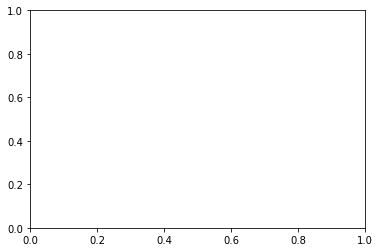

In [124]:
xgb.plot_tree(model)

In [125]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [123]:
!pip install graphviz
!conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.



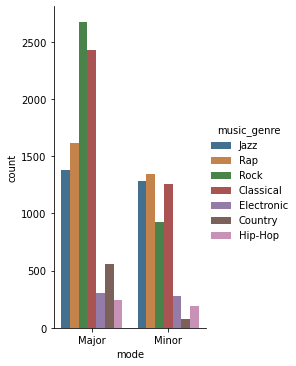

In [90]:
sns.catplot(x="mode", hue="music_genre", data=df, saturation=.5,
                kind="count", ci=None, aspect=.6)

In [ ]:
df = train_df.copy()
sc = MinMaxScaler()
num_df = sc.fit_transform(df[['popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence']])
num_df = pd.DataFrame(num_df, columns=['popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence'])
num_df

popularity  acousticness  danceability  duration_ms    energy  \
0        0.453203      0.886799      0.512382     0.062933  0.569065   
1        0.551340      0.922305      0.618553     0.063404  0.604311   
2        0.820398      0.018311      0.896699     0.080142  0.886655   
3        0.513879      0.009395      0.547873     0.055475  0.940645   
4        0.415576      0.784686      0.214936     0.120262  0.532129   
...           ...           ...           ...          ...       ...   
15676    0.000000      0.792196      0.320906     0.000000  0.571305   
15677    0.373360      0.807131      0.392763     0.110876  0.644085   
15678    0.323301      0.827186      0.498604     0.170597  0.736888   
15679    0.550105      0.103623      0.575911     0.044343  0.912809   
15680    0.520846      0.774057      0.434666     0.055928  0.701747   

       instrumentalness  liveness  loudness  speechiness   valence  
0              0.000000  0.122598  0.698132     0.023086  0.556157  
1              0.000028  0.148456  0.706374     0.016477  0.331665  
2              0.000000  0.023844  0.875901     0.098362  0.590104  
3              0.000204  0.101460  0.890150     0.147079  0.913441  
4              0.002553  0.110992  0.449663     0.015648  0.069094  
...                 ...       ...       ...          ...       ...  
15676          0.026631  0.217744  0.655541     0.021906  0.579883  
15677          0.000481  0.624669  0.485333     0.434696  0.565495  
15678          0.193990  0.375793  0.773827     0.017169  0.807166  
15679          0.000082  0.140640  0.831930     0.037324  0.373919  
15680          0.466232  0.118820  0.758334     0.006193  0.333136  

[15681 rows x 10 columns]

In [ ]:
df.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

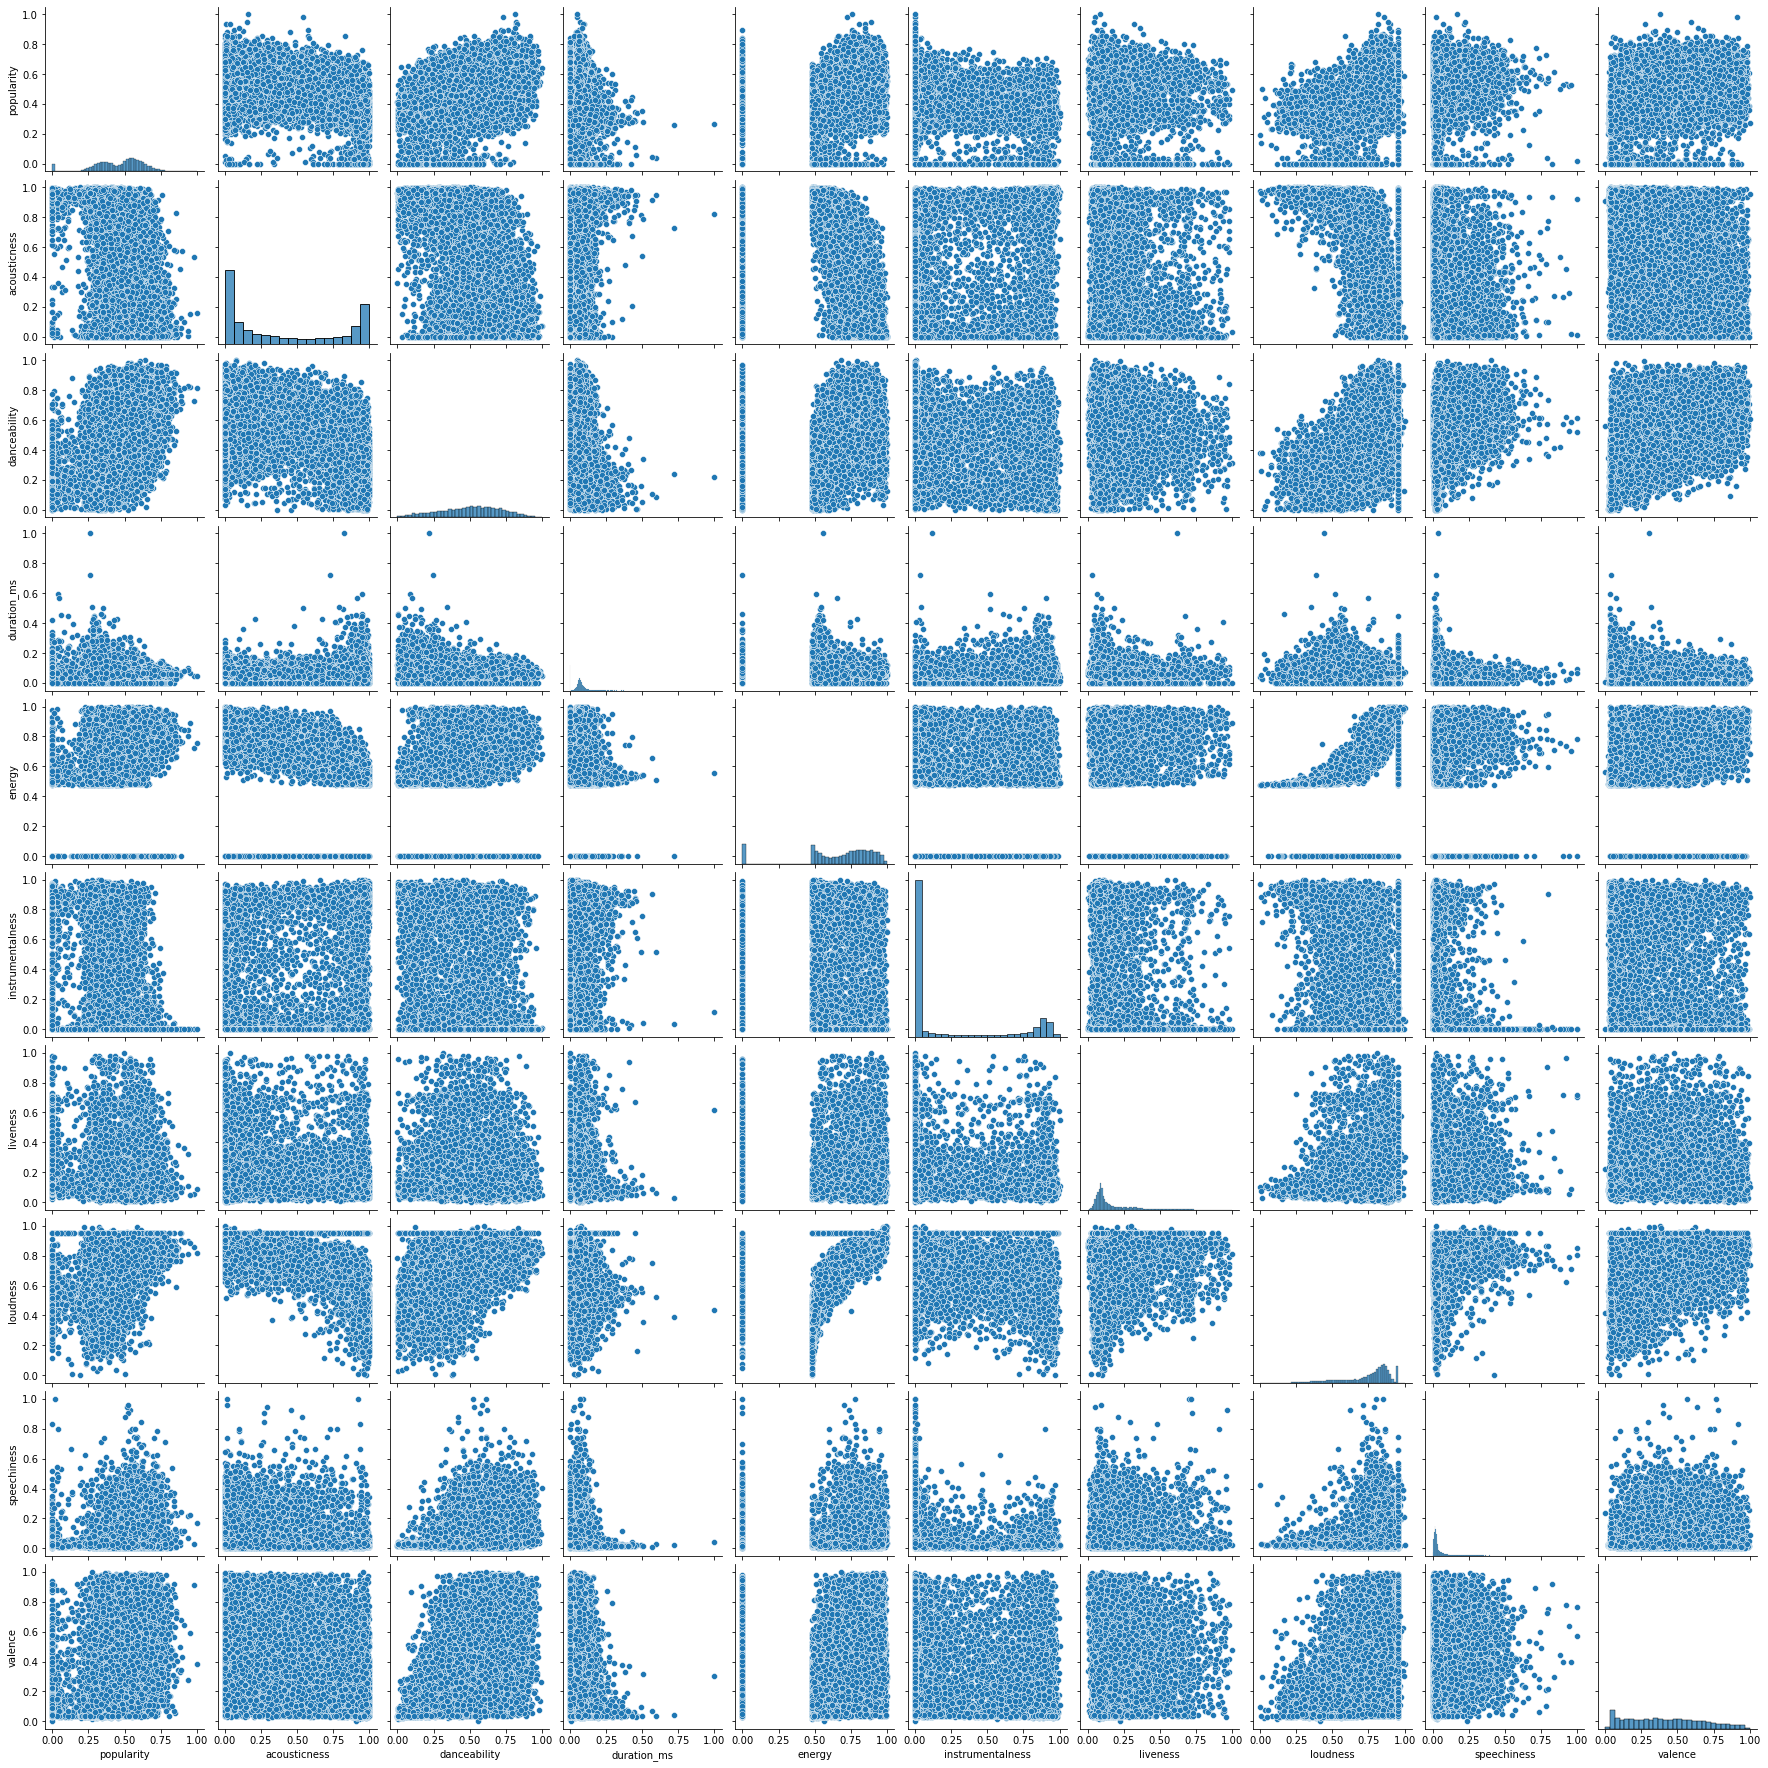

In [ ]:
sns.pairplot(num_df)

<AxesSubplot:xlabel='acousticness', ylabel='loudness'>

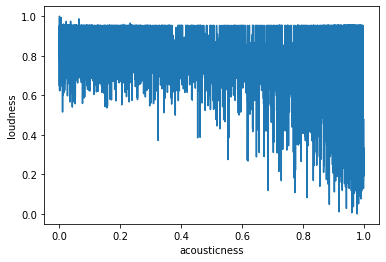

In [ ]:
sns.lineplot(x=num_df['acousticness'], y=num_df['loudness'])

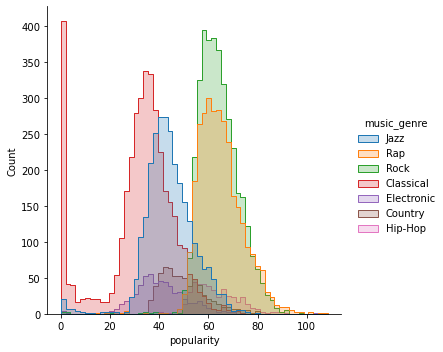

In [ ]:
cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

sns.displot(df, x="popularity", hue="music_genre", element='step')

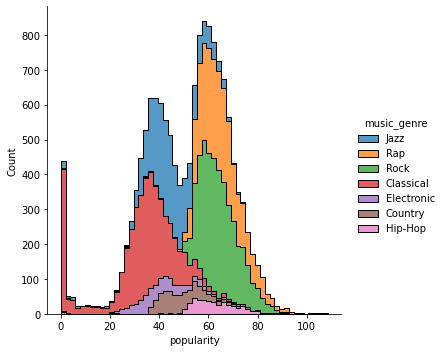

In [ ]:
sns.displot(df, x="popularity", hue="music_genre", element='step', multiple='stack')

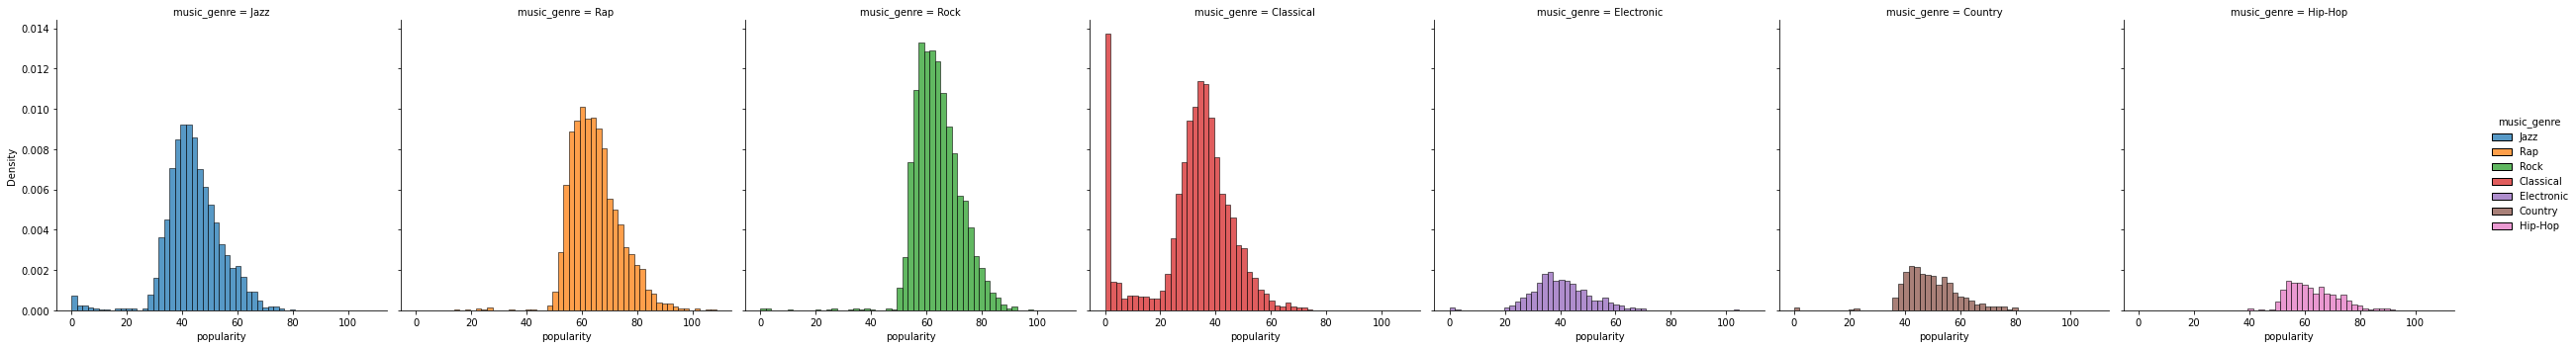

In [ ]:
sns.displot(df, x="popularity", col="music_genre", hue='music_genre', stat='density')

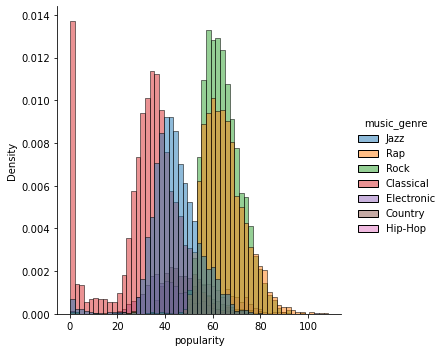

In [ ]:
sns.displot(df, x="popularity", hue="music_genre", stat="density")

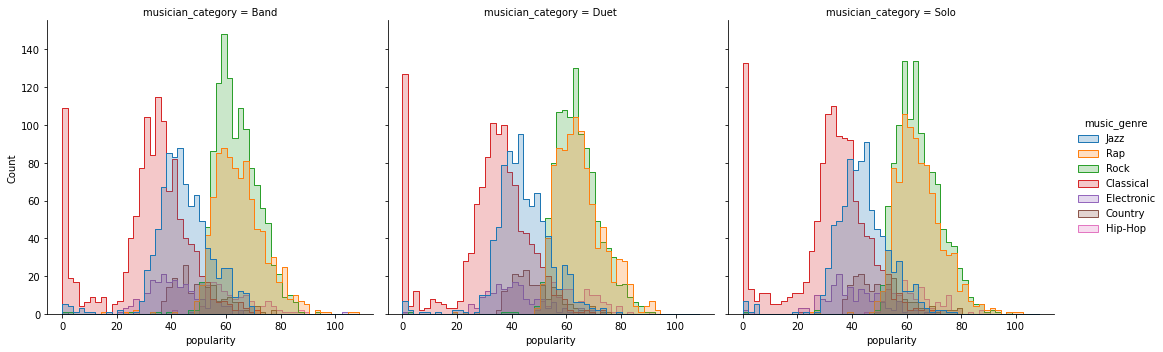

In [ ]:
sns.displot(df, x="popularity", hue="music_genre", element='step', col='musician_category')

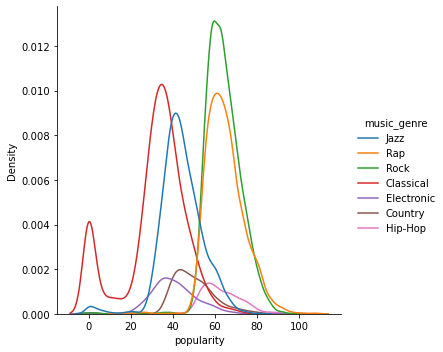

In [ ]:
sns.displot(df, x="popularity", hue='music_genre', kind="kde")

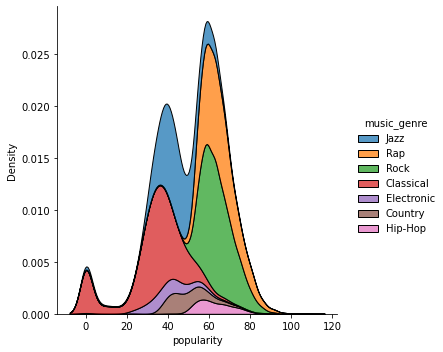

In [ ]:
sns.displot(df, x="popularity", hue='music_genre', kind="kde", multiple='stack', fill=True)

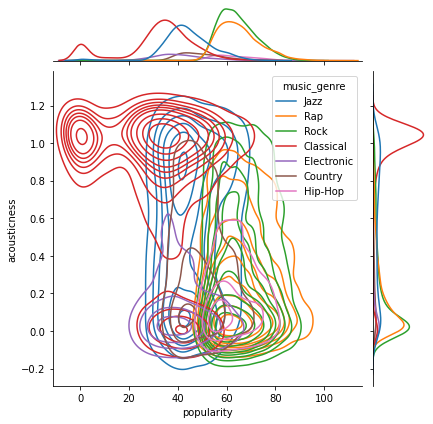

In [ ]:
sns.jointplot(data=df, x="popularity", y="acousticness", hue='music_genre', kind="kde")

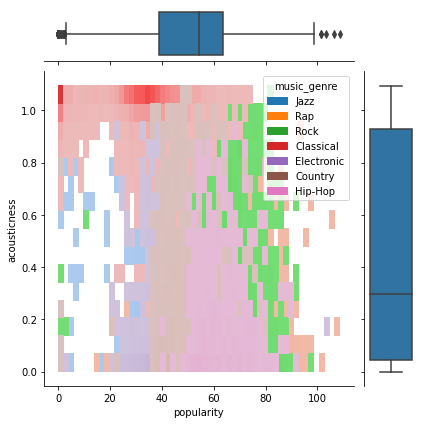

In [ ]:
g = sns.JointGrid(data=df, x="popularity", y="acousticness",  hue="music_genre")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

KeyboardInterrupt: ignored

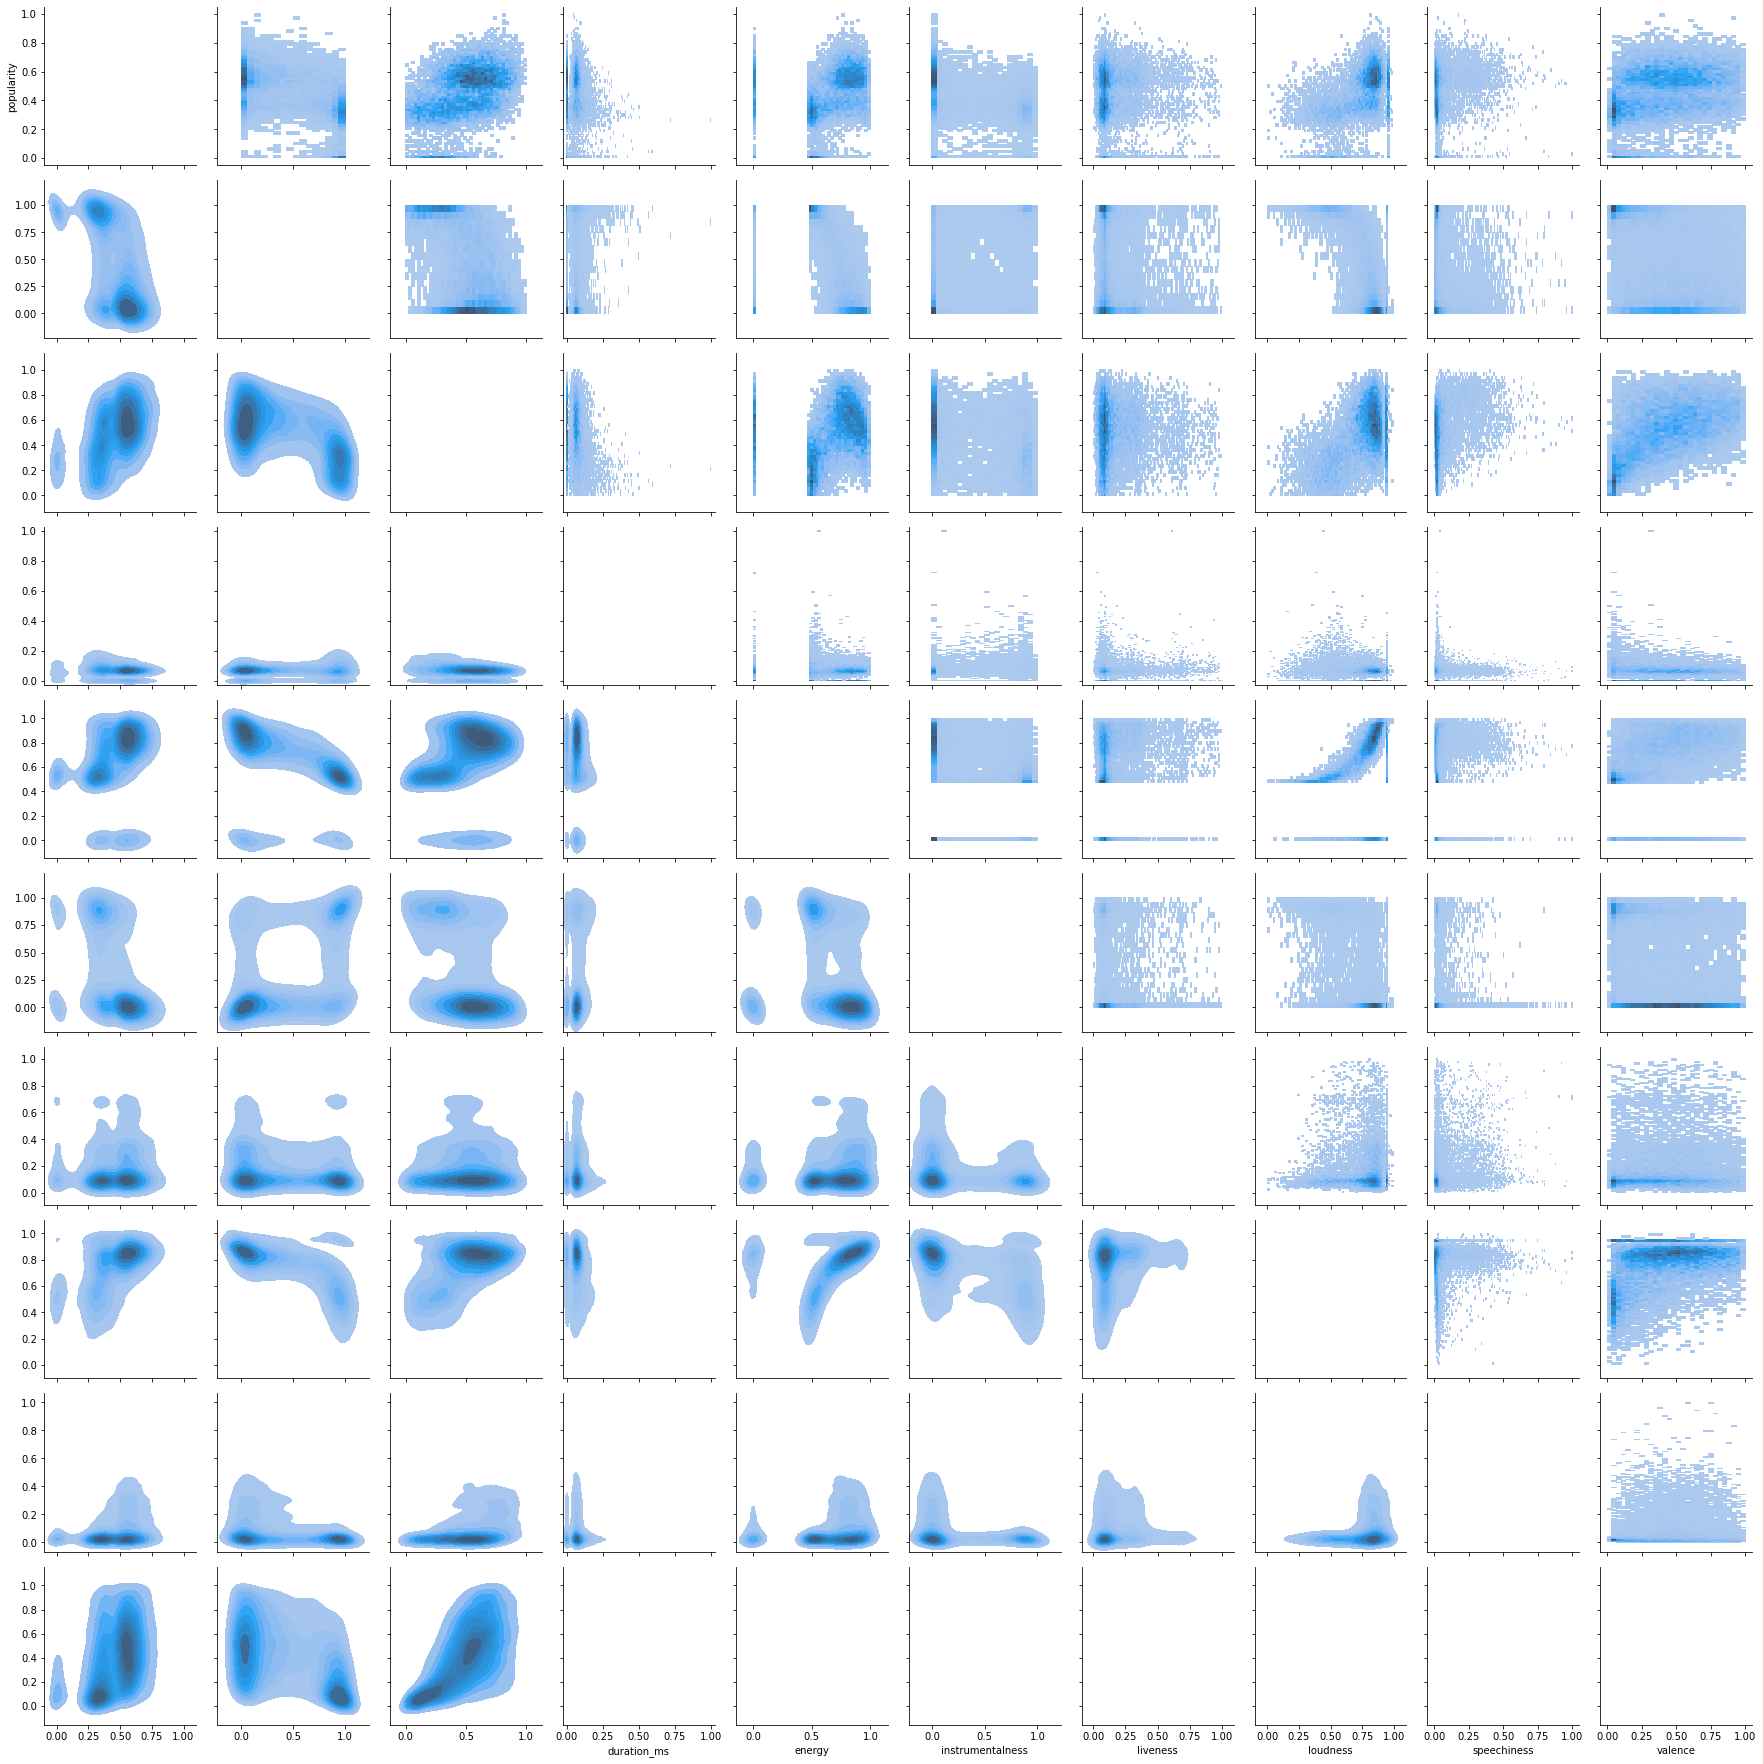

In [ ]:
# g = sns.PairGrid(num_df)
# g.map_upper(sns.histplot)
# g.map_lower(sns.kdeplot, fill=True)
# g.map_diag(sns.histplot, kde=True)

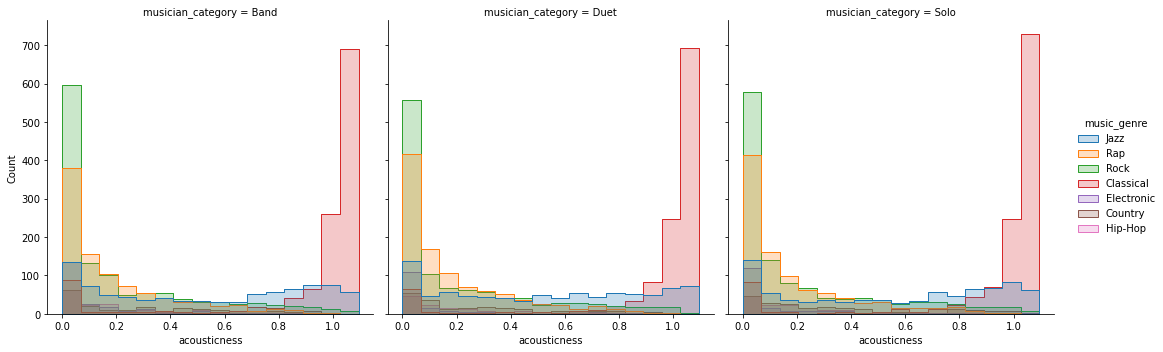

In [ ]:
sns.displot(train_df, x="acousticness", hue="music_genre", element='step', col='musician_category')